# Import Dataset

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import math
# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taufikyasirs/marketing_campaign_marketektive/master/marketing_campaign.csv',delimiter=';')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Descriptive Statistics

In [ ]:
#nama kolom yang ada pada dataset
df.columns.to_list()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [ ]:
print(f'Terdapat {df.shape[0]} baris data dan {df.shape[1]} kolom didalam dataset')

Terdapat 2240 baris data dan 29 kolom didalam dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Dataset terdiri dari **29 columns** dan **2240 rows** data
- Variasi tipe data yang ada pada dataset adalah **int64, object, float64**
- Pada kolom **Income** memiliki **2216 rows nilai non-null** dari keseluruhan **2240 rows** yang berarti terdapat **24 nilai null / missing values** sedangkan untuk kolom lainya jumlah rows non-null sama dengan keseluruan rows data yang ada
- Type data keseluruhan sudah tidak mengalami masalah hanya sebaiknya pada data yang isinya berkaitan dengan waktu dan tanggal ada baiknya dijadikan ke tipe **Datetime** saja
- Guna mempermudah analisis dan pencarian insight maka dilakukan **penambahan column**  beberapa column seperti:
    *   **Ratio_Acceptence**: Ratio dari total acceptence campaign dari 5 campaign yang diberikan.
    *   **Frequency_Purchase**: Total Purchase dari seluruh number of deals yang dilakukan oleh customer.
    *   **Total_Revenue**: Total pendapatan yang diterima dari transaksi yang dilakukan oleh customer.
    *   **Age**: Umur customer pada tahun 2013 karena itu merupakan tahun terakhir pada data yang ada.
    *   **Age_Category**: Category umur customer (remaja, dewasa, lansia)
    *   **Income Category**: Category income customer (low, medium, high)



In [ ]:
# Modify Data Type Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
# Menambahkan kolom Tahun
df['Year_Enroll'] = df['Dt_Customer'].dt.year

# Creating Age Column
df['Age'] = 2013 - df['Year_Birth']

# Creating Age Category Column
# Fungsi untuk menetapkan kelompok usia
def age_cat(age):
    if age <= 25:
        return 'Remaja'
    elif age <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'
# Menerapkan fungsi untuk membuat kolom baru 'Age Category'
df['Age_Category'] = df['Age'].apply(age_cat)

# Creating Income Category Column
# Fungsi untuk menetapkan kelompok usia
def income_cat(income):
    if income <= df['Income'].quantile(0.25):
        return 'Low'
    elif income <= df['Income'].quantile(0.5):
        return 'Medium'
    else:
        return 'High'
# Menerapkan fungsi untuk membuat kolom baru 'Income Category'
df['Income_Category'] = df['Income'].apply(income_cat)

# Creating Total Campaign Column
df['Ratio_Acceptence'] = (((df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']	+ df['AcceptedCmp4'] + df['AcceptedCmp5'])/5)*100)

# Creating Total Purchase Column
df['Frequency_Purchase'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']	+ df['NumWebPurchases'] + df['NumWebVisitsMonth']

# Creating Total Spent Column
df['Total_Revenue'] = df['MntWines'] + df['MntFishProducts'] + df['MntMeatProducts']	+ df['MntFruits'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Year_Enroll,Age,Age_Category,Income_Category,Ratio_Acceptence,Frequency_Purchase,Total_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,2012,56,Lansia,High,0.0,32,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,2014,59,Lansia,Medium,0.0,11,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,2013,48,Lansia,High,0.0,25,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,2014,29,Dewasa,Low,0.0,14,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,2014,32,Dewasa,High,0.0,24,422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [ ]:
#memisahkan kolom kategorik dan numerik
numerik = ['Year_Birth'
           ,'Income'
           ,'Kidhome'
           ,'Teenhome'
           ,'Recency'
           ,'MntWines'
           ,'MntFruits'
           ,'MntMeatProducts'
           ,'MntFishProducts'
           ,'MntSweetProducts'
           ,'MntGoldProds'
           ,'NumDealsPurchases'
           ,'NumWebPurchases'
           ,'NumCatalogPurchases'
           ,'NumStorePurchases'
           ,'NumWebVisitsMonth'
           ,'Z_CostContact'
           ,'Z_Revenue'
           ,'Ratio_Acceptence'
           ,'Frequency_Purchase'
           ,'Total_Revenue'
           ,'Age']

kategorik = ['ID'
             ,'Education'
             ,'Marital_Status'
             ,'AcceptedCmp1'
             ,'AcceptedCmp2'
             ,'AcceptedCmp3'
             ,'AcceptedCmp4'
             ,'AcceptedCmp5'
             ,'Complain'
             ,'Response'
             ,'Dt_Customer'
             ,'Age_Category'
             ,'Income_Category'
             ,'Year_Enroll']

In [ ]:
round(df[numerik].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0


**Year_Birth:**<br>
- Tahun kelahiran tertua (min) yaitu **1893**, hal ini agak janggal saja karena jika dibandingkan dengan kelahiran termuda yang ada pada data terdapat selisih yang hampir 100 tahun, perlu dikonfirmasi apakah data ini benar atau terjadi kesalahan input

**Income**<br>
- Nilai rata-rata nya adalah 52247.25 dan Nilai tengah(Median) nya adalah 51381.50,nilai rata-rata lebih besar dari pada median maka dari kedua nilai tersebut secara tidak langsung dapat dikatakan bahwa ada kemencengan distribusi data

**Kidhome dan Teenhome**<br>
- Dari data ini tidak menunjukan keanehan

**Recency**<br>
- Nilai rata-rata dan median data ini hampir sama sehingga dapat dikatakan kemungkinan besar datanya berdistribusi normal

**data produk bulanan pelanggan**<br>
1. MntWines, memiliki nilai mean = 303.94 dan median = 173.5
2. MntFruits, memiliki nilai mean = 26.30 dan median = 8.00
3. MntMeatProducts, memiliki nilai mean = 166.95 dan median = 67.00
4. MntFishProducts, memiliki nilai mean = 37.53 dan median = 12.00
5. MntSweetProducts, memiliki nilai mean = 27.06 dan median = 8.00
6. MntGoldProds, memiliki nilai mean = 44.02 dan median = 24.00

- karena terdapat perbedaan nilai yang lumayan signifikan dari kedua nilai tersebut secara tidak langsung dapat dikatakan bahwa ada kemencengan distribusi data

**data pembelian**
1. NumDealsPurchases memiliki nilai mean = 2.33 dan median = 2.00
2. NumWebPurchases memiliki nilai mean = 4.08 dan median = 4.0
3. NumCatalogPurchases memiliki nilai mean = 2.66 dan median = 2.00
4. NumStorePurchases memiliki nilai mean = 5.79 dan median = 5.00

- karena terdapat perbedaan nilai yang relatif tidak besar dari kedua nilai tersebut secara tidak langsung dapat dikatakan bahwa distribusi data mendekati normal

**NumWebVisitsMont**
- memiliki nilai mean = 5.32 dan median = 6.00 karena terdapat perbedaan nilai yang relatif tidak besar dari kedua nilai tersebut secara tidak langsung dapat dikatakan bahwa distribusi data mendekati normal

**untuk nilai Z_CostContact dan Z_Revenue dengan standar deviasi adalah 0 dan nilai lainya yang sama menunjukan bahwa data ini memiliki 1 nilai yang sama pada setiap row nya**

In [ ]:
cat_des = df[kategorik].astype("category").describe().transpose()
cat_des['top_percentage'] = cat_des['freq']/cat_des['count']*100
cat_des

,count,unique,top,freq,top_percentage
ID,2240,2240,0,1,0.044643
Education,2240,5,Graduation,1127,50.3125
Marital_Status,2240,8,Married,864,38.571429
AcceptedCmp1,2240,2,0,2096,93.571429
AcceptedCmp2,2240,2,0,2210,98.660714
AcceptedCmp3,2240,2,0,2077,92.723214
AcceptedCmp4,2240,2,0,2073,92.544643
AcceptedCmp5,2240,2,0,2077,92.723214
Complain,2240,2,0,2219,99.0625
Response,2240,2,0,1906,85.089286


- Pada data ID semuanya hanya muncul sekali ditunjukkan oleh count dan unique yang nilainya sama, karena itu dapat dinyatakan bahwa tidak ada duplicate ID pada data
- mayoritas pelangan adalah pada kategori pendidikan `Graduation` sebanyak 1127 orang, nilai ini sudah setengah dari keseluruhan data
- untuk status respon campaign(1-5) mayoritas pelanggan tidak merespon (diatas 90 % pelanggan tidak merespon)
- jumlah complain relatif kecil hanya 0.04%
- dan respon customer relatif rendah dilihat dari persentase customer yang tidak memberikan respon adalah 85.09%

# Univariate Analysis

In [ ]:
#cek unique value
for x in df.columns :
    unq = list(df[x].unique())
    sorted(unq)

    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
[numpy.datetime64('2012-09-04T00:00:00.000000000'), numpy.datetime64('2014-03-08T00:00:00.000000000'), numpy.datetime64('2013-08-21T00:00:00.000000000'), numpy.datetime64('2014-02-10T00:00:00.000000000'), numpy.datetime64('2014-01-19T00:00:00.000000000'), numpy.datetime64('2013-09-09T00:00:00.000000000'), numpy.datetime64('2012-11-13T00:00:00.000000000'), numpy.datetime64('2013-05-08T00:00:00.000000000'), numpy.datetime64('20

In [ ]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

In [ ]:
print('The number of numerical features is {}'.format(len(num_cols)))

# view = timestamp+num_cols
# n = int(len(view)/2)
# df[view[:n+1]].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

df[["Dt_Customer", "Year_Birth", "Income", "Kidhome", "Teenhome", "Recency"]].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 18


,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency
count,2240,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000
mean,2013-07-10 10:01:42.857142784,1968.805804,52247.251354,0.444196,0.506250,49.109375
std,-,11.984069,25173.076661,0.538398,0.544538,28.962453
min,2012-07-30 00:00:00,1893.000000,1730.000000,0.000000,0.000000,0.000000
25%,2013-01-16 00:00:00,1959.000000,35303.000000,0.000000,0.000000,24.000000
50%,2013-07-08 12:00:00,1970.000000,51381.500000,0.000000,0.000000,49.000000
75%,2013-12-30 06:00:00,1977.000000,68522.000000,1.000000,1.000000,74.000000
max,2014-06-29 00:00:00,1996.000000,666666.000000,2.000000,2.000000,99.000000


In [ ]:
df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [ ]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 10


In [ ]:
dfc = df.copy()
dfc["Year_Birth"] = dfc["Year_Birth"].astype("category")
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
dfc[cat].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
AcceptedCmp1,2240.0,0.064286,0.245316,0.0,0.00,0.0,0.00,1.0
AcceptedCmp2,2240.0,0.013393,0.114976,0.0,0.00,0.0,0.00,1.0
AcceptedCmp3,2240.0,0.072768,0.259813,0.0,0.00,0.0,0.00,1.0
AcceptedCmp4,2240.0,0.074554,0.262728,0.0,0.00,0.0,0.00,1.0
AcceptedCmp5,2240.0,0.072768,0.259813,0.0,0.00,0.0,0.00,1.0
Complain,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
Response,2240.0,0.149107,0.356274,0.0,0.00,0.0,0.00,1.0


In [ ]:
#cek unique value
for x in df.columns :
    unq = list(df[x].unique())
    sorted(unq)

    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
[numpy.datetime64('2012-09-04T00:00:00.000000000'), numpy.datetime64('2014-03-08T00:00:00.000000000'), numpy.datetime64('2013-08-21T00:00:00.000000000'), numpy.datetime64('2014-02-10T00:00:00.000000000'), numpy.datetime64('2014-01-19T00:00:00.000000000'), numpy.datetime64('2013-09-09T00:00:00.000000000'), numpy.datetime64('2012-11-13T00:00:00.000000000'), numpy.datetime64('2013-05-08T00:00:00.000000000'), numpy.datetime64('20

In [ ]:
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
for i in cat:
    print(i)
    print(df[i].value_counts().iloc[:10])
    print()

ID
5524     1
6885     1
3478     1
7494     1
1763     1
7250     1
2005     1
10770    1
2072     1
9743     1
Name: ID, dtype: int64

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
Name: Year_Birth, dtype: int64

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

AcceptedCmp1
0    2096
1     144
Name: AcceptedCmp1, dtype: int64

AcceptedCmp2
0    2210
1      30
Name: AcceptedCmp2, dtype: int64

AcceptedCmp3
0    2077
1     163
Name: AcceptedCmp3, dtype: int64

AcceptedCmp4
0    2073
1     167
Name: AcceptedCmp4, dtype: int64

AcceptedCmp5
0    2077
1     163
Name: AcceptedCmp5, dtype: int64

Complain
0    2219
1      21
Name: Complain, dtype: int64

R

**Observations:**

- Terlalu banyak kategori pada kolom `ID`, `Year_Birth`
- Pada data `ID` semuanya hanya muncul sekali, sehingga dapat dikatakan tidak ada duplicate ID pada data
- Customer banyak yang lahir (`Year Birth`) pada tahun `1976 (age = 38 years)` sebanyak 89 orang
- Kategori `Education`, "2n Cycle" dan "Master" memliki arti yang sama.
- Kategori `Education`: customer mayoritas memiliki kategori pendidikan `Graduation` sebanyak 1127 orang, namun nilainya sangat besar di banding yang lain
- Dalam kategori `Marital Status`,: customer mayoritas sudah menikan (Married) 864 orang
- Dalam kategori `Marital Status`, "Single" dan "Alone" memiliki arti yang sama.
- Dalam kategori `Marital Status`, "Together" dan "Married" memiliki arti yang sama.
- Dalam kategori `Marital Status`, ada beberapa data yang tidak jelas apa yang dimaksud yaitu "Absurd" dan "YOLO", maka disarankan digabung dan diganti "Others".
- Pada kategori `AcceptedCmp(1-5)`, customer mayoritas tidak merespon / accept dari campaign yang dilakukan
- Pada kategori `Complain`, customer mayoritas tidak pernh complain dari campaign yang dilakukan
- Target yang kita miliki ada pada kolom `Respon`, yang mana memiliki ketimpangan yang sangat tinggu (Imbalanced Data),
    - Tidak merespon = 1906
    - Merespon = 334
    
**Hal yang harus dilakukan saat Data Pre-Processing adalah:**

- Akan dilakukan `replace data / menyatukan yang memiliki arti yang sama` agar mengurangi jumlah dimensi maupun `redudansi pada data`
- Pada kolom `Response`,  Sebaran kategori yang timpang pada target. Pada target, menyebabkan proses Machine Learning gagal. Oleh karena itu, perlu dilakukan `Sampling Data (Undersampling/Oversampling/Combinded/SMOTE/dll)`
- Akan dilakukan `Feature Encoding` pada kolom `Education` dan `Marital_Status` untuk proses modelling, karena masih belum memiliki representasi nilai numerical

BOXPLOT

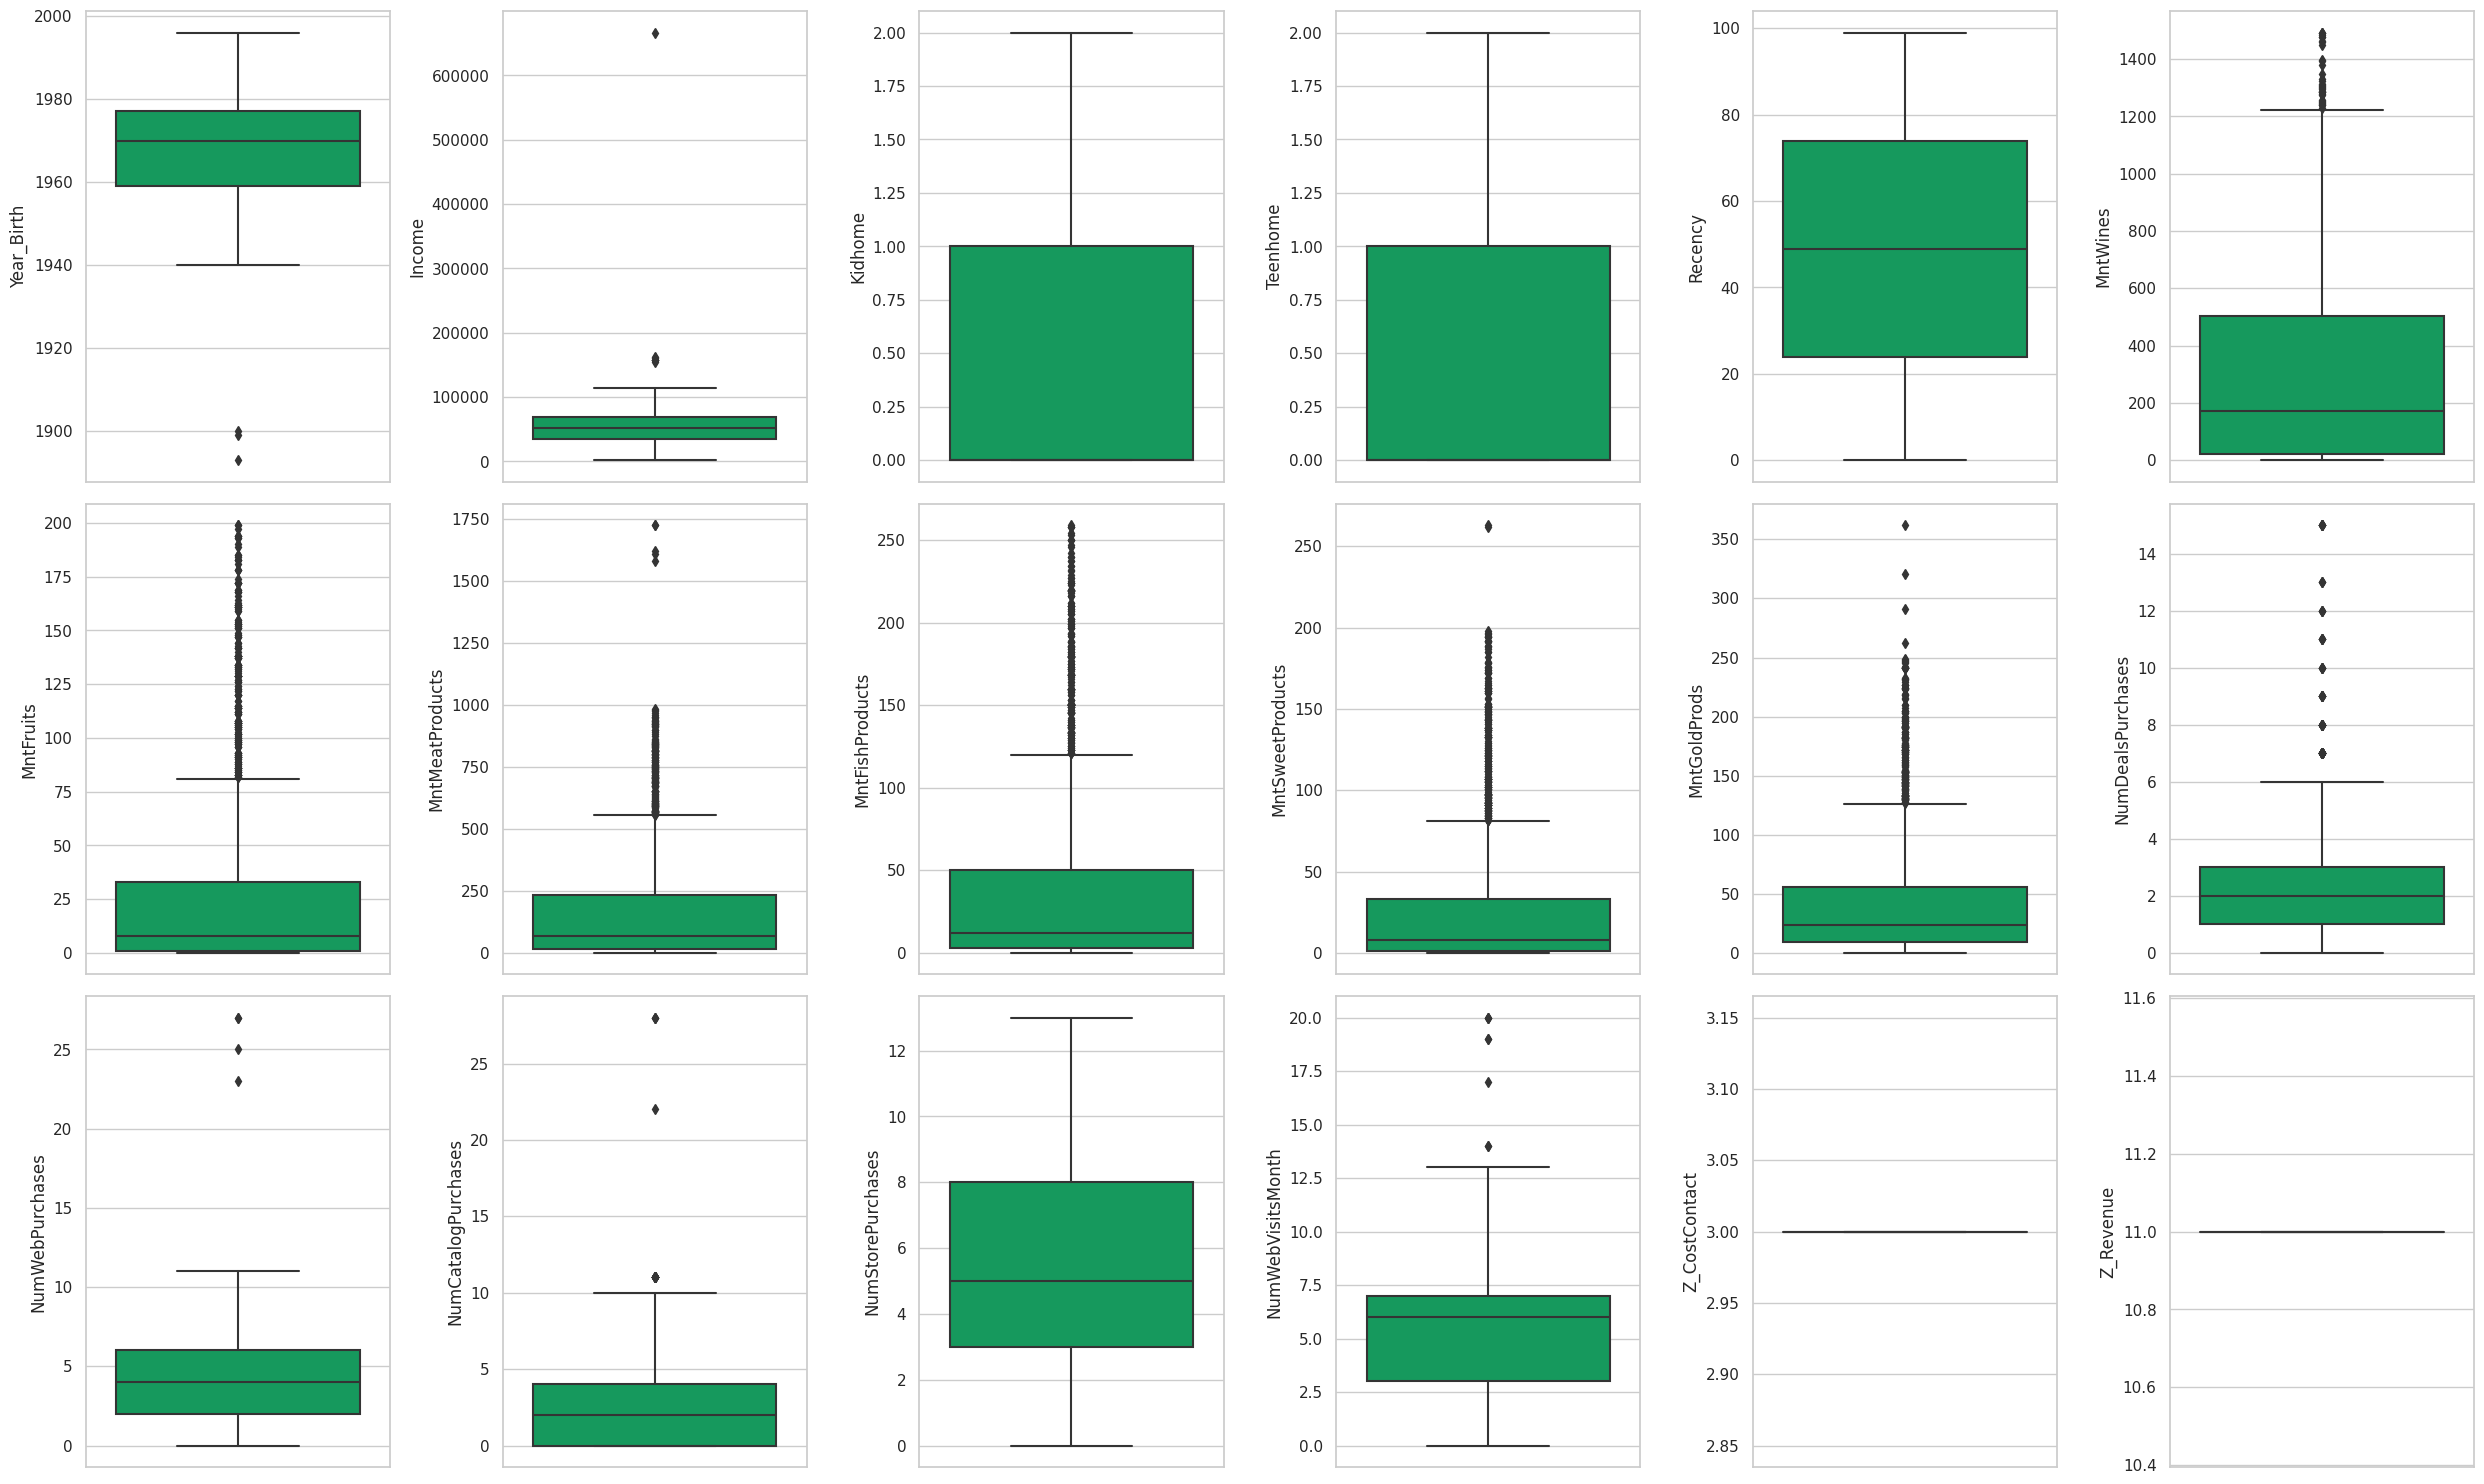

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

VIOLINPLOT

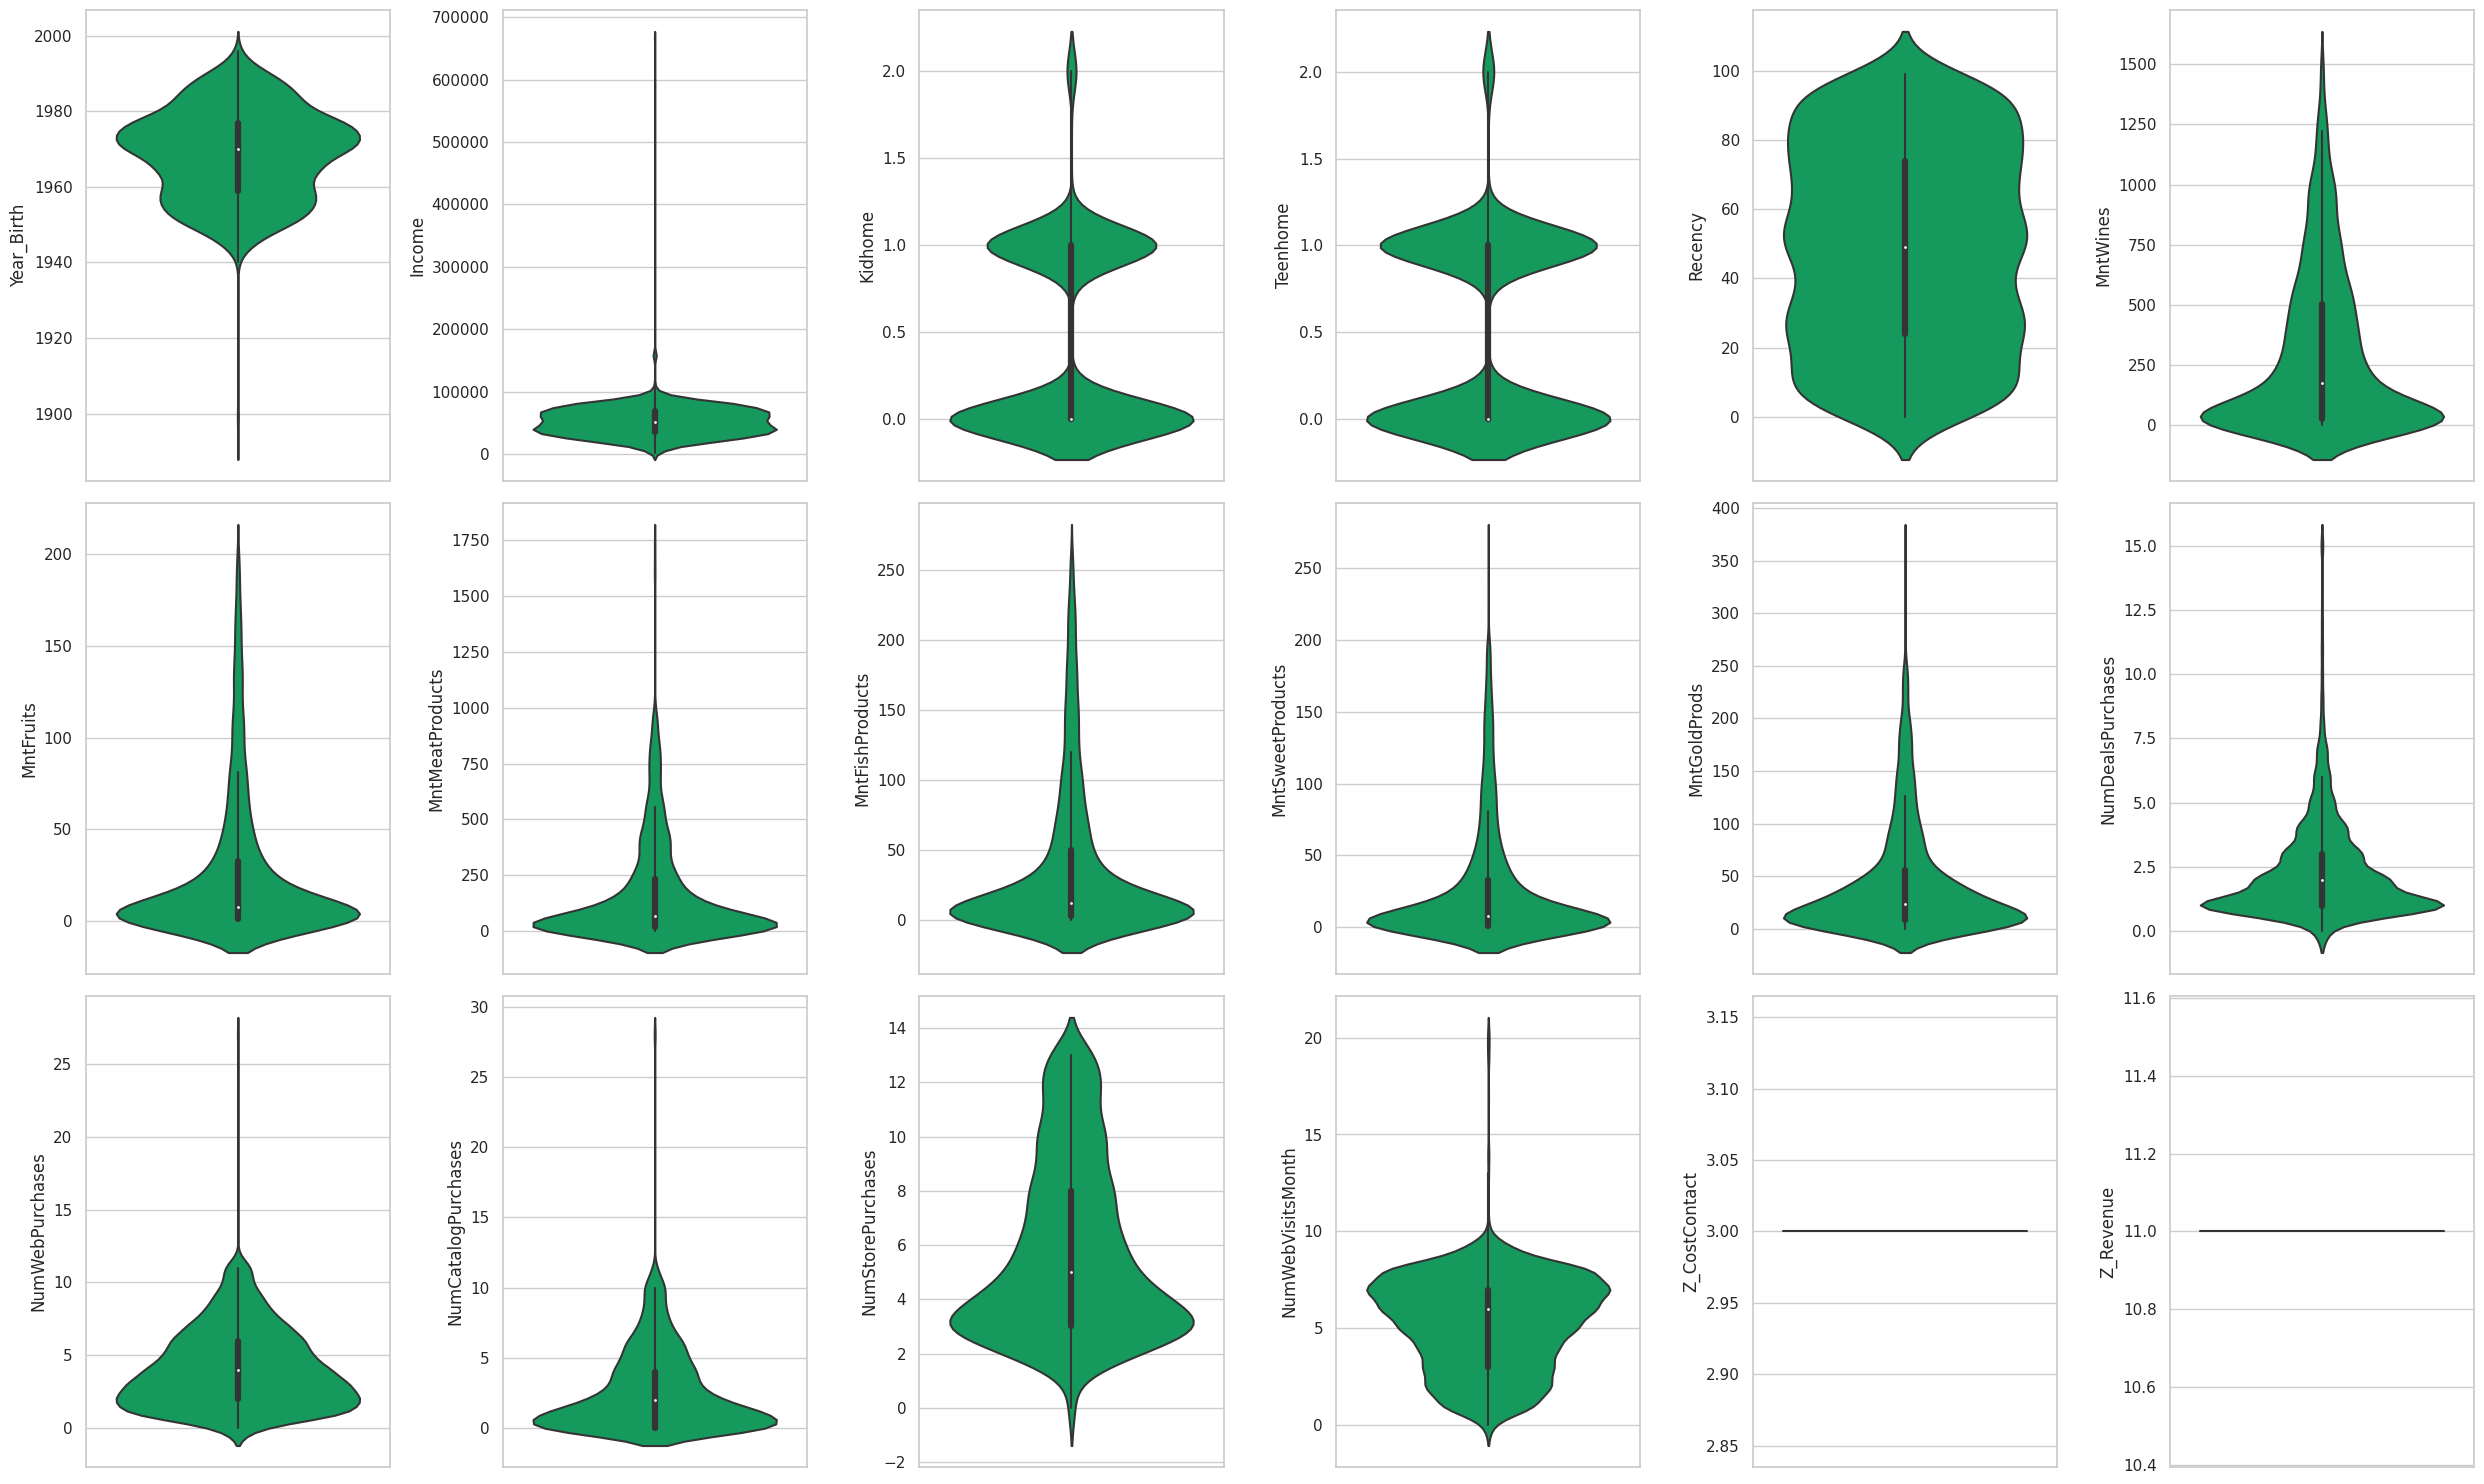

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.violinplot(y=df[num_cols[i]], color='#00af5f',orient='v')
    plt.tight_layout()

In [ ]:
# Checking Outlier
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 723
Not Outlier All Data : 1517



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-14525.5,118350.5,32,2208
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,MntWines,True,-697.0,1225.0,35,2205
6,MntFruits,True,-47.0,81.0,227,2013
7,MntMeatProducts,True,-308.0,556.0,175,2065
8,MntFishProducts,True,-67.5,120.5,223,2017
9,MntSweetProducts,True,-47.0,81.0,248,1992


**Observations:**

Terdapat outlier pada kolom Year_Birth, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitMonth.

- Pada kolom `Year_Birth`, outlier terjauh adalah di bawah 1900
- Pada kolom `Income`, outlier terjauh adalah di atas $600,000.
- Pada kolom `MntWines`, outlier berada pada angka 1200 keatas.
- Pada kolom `MntFruits`, outlier berada di sekitar angka 80 sampai 200.
- Pada kolom `MntMeatProducts`, outlier terjauh ada di sekitar angka 1,750.
- Pada kolom `MntFishProducts`, outlier berada di sekitar angka 125 sampai diatas 250.
- Pada kolom `MntSweetProducts`, outlier terjauh berada di sekitar angka 250.
- Pada kolom `MntGoldProds`, outlier terjauh berada di sekitar angka 350.
- Pada kolom `NumDealsPurchases`, outlier terjauh berada di angka 15.
- Pada kolom `NumWebPurchases`, outlier berada di sekitar angka 25.
- Pada kolom `NumCatalogPurchases`, outlier terjauh berada di atas angka 25.
- Pada kolom `NumWebVisitsMonth`, outlier terjauh berada di angka 20.

**Hal yang harus dilakukan saat Data Pre-Processing adalah:**
- Mengaplikasikan `Log Transformation` untuk `Feature Scaling` dan `Handling Outlier` yang mana transformasi ini de-emphasizes / minimize `outliers` dan dapat membantu untuk potentially obtain a `bell-shaped / normal distribution`. Hal ini juga dikarenakan jumlah data yang terbatas hanya sebanyak 2240 baris data saja, menjadi pilihan terbaik karena tanpa menghapus baris data.
- Alternatif lainnya, Membersihkan data dengan cara menghapus `outliers` berdasarkan `IQR atau Z-score` namun akan mengurangi data yang dimiliki

Analisis Mendalam :

-Dalam variabel Year_Birth, sebagian besar pelanggan lahir antara tahun 1960 hingga tahun 1975 ke atas, dengan median di sekitar tahun 1970. Terdapat juga nilai ekstrem yang dianggap sebagai outlier pada variabel ini, dengan nilai yang ekstrim pada rentang tahun 1800 ke bawah.

- Pada variabel Income, mayoritas pelanggan memiliki pendapatan antara 35,000 hingga 70,000, dengan nilai tengah sekitar 50,000. Ditemukan juga outlier yang memiliki nilai ekstrim di sekitar 600,000.

- Variabel Recency menunjukkan mayoritas pelanggan melakukan pembelian lagi dalam rentang waktu 25 hingga 75 hari, dengan nilai tengah sekitar 50 hari. Tidak ada nilai outlier pada variabel ini.

- Dalam variabel MntWines, mayoritas pembelian produk Wine oleh pelanggan berkisar antara 10 hingga 500 selama 2 tahun, dengan nilai median sekitar 190. Terdapat pula outlier yang membeli produk Wine dengan nilai lebih dari 1200.

- Pada variabel MntFruits, pembelian produk buah oleh pelanggan mayoritas berkisar antara 1 hingga 35, dengan median sekitar 10. Outlier terdeteksi dengan pembelian produk buah pada rentang ekstrim sekitar 80 hingga $200.

- Variabel MntMeatProducts menunjukkan mayoritas pembelian produk daging oleh pelanggan berkisar antara 15 hingga 250 dalam rentang 2 tahun, dengan median sekitar 65. Ditemukan outlier dengan pembelian produk daging yang mencapai 1750.

- Dalam variabel MntFishProducts, mayoritas pembelian produk ikan oleh pelanggan berkisar antara 3 hingga 50 dalam rentang 2 tahun, dengan median sekitar $10. Outlier terdeteksi dengan pembelian produk ikan pada rentang ekstrim lebih dari 125 hingga di atas 250.

- Pada variabel MntSweetProducts, mayoritas pembelian produk manisan oleh pelanggan berkisar antara 1 hingga 33 selama 2 tahun, dengan median sekitar 10. Outlier terdeteksi dengan pembelian produk manisan yang melampaui 250.

- Variabel MntGoldProds menunjukkan mayoritas pembelian produk emas oleh pelanggan berkisar antara 10 hingga 55 dalam rentang 2 tahun, dengan median sekitar 25. Terdapat juga outlier yang membeli produk emas dengan nilai lebih dari 350.

- Dalam variabel NumDealsPurchases, mayoritas pembelian produk menggunakan diskon oleh pelanggan berkisar antara 1 hingga 3 kali, dengan median sekitar 2 kali. Outlier terdeteksi pada pelanggan yang melakukan pembelian dengan diskon antara 7 hingga 15 kali.

- Pada variabel NumWebPurchases, mayoritas pembelian produk melalui Web oleh pelanggan berkisar antara 2 hingga 6 kali, dengan median sekitar 4 kali. Terdapat juga outlier dengan lebih dari 25 kali pembelian produk melalui Web.

- Variabel NumCatalogPurchases menunjukkan mayoritas pembelian produk melalui katalog oleh pelanggan berkisar antara 0 hingga 4 kali, dengan median sekitar 3 kali. Outlier terdeteksi pada pelanggan yang melakukan pembelian melalui katalog lebih dari 25 kali.

- Dalam variabel NumStorePurchases, mayoritas pembelian produk melalui toko oleh pelanggan berkisar antara 3 hingga 8 kali, dengan median sekitar 5 kali. Tidak ditemukan nilai outlier pada variabel ini.

- Variabel NumWebVisitsMonth menunjukkan mayoritas kunjungan melalui web oleh pelanggan berkisar antara 3 hingga 7 kali dalam satu bulan terakhir, dengan median sekitar 6 kali. Tidak ditemukan nilai outlier pada variabel ini.
- Terdapat juga outlier dengan jumlah kunjungan ekstrim antara 13 hingga 20 kali dalam satu bulan terakhir.

DISTPLOT

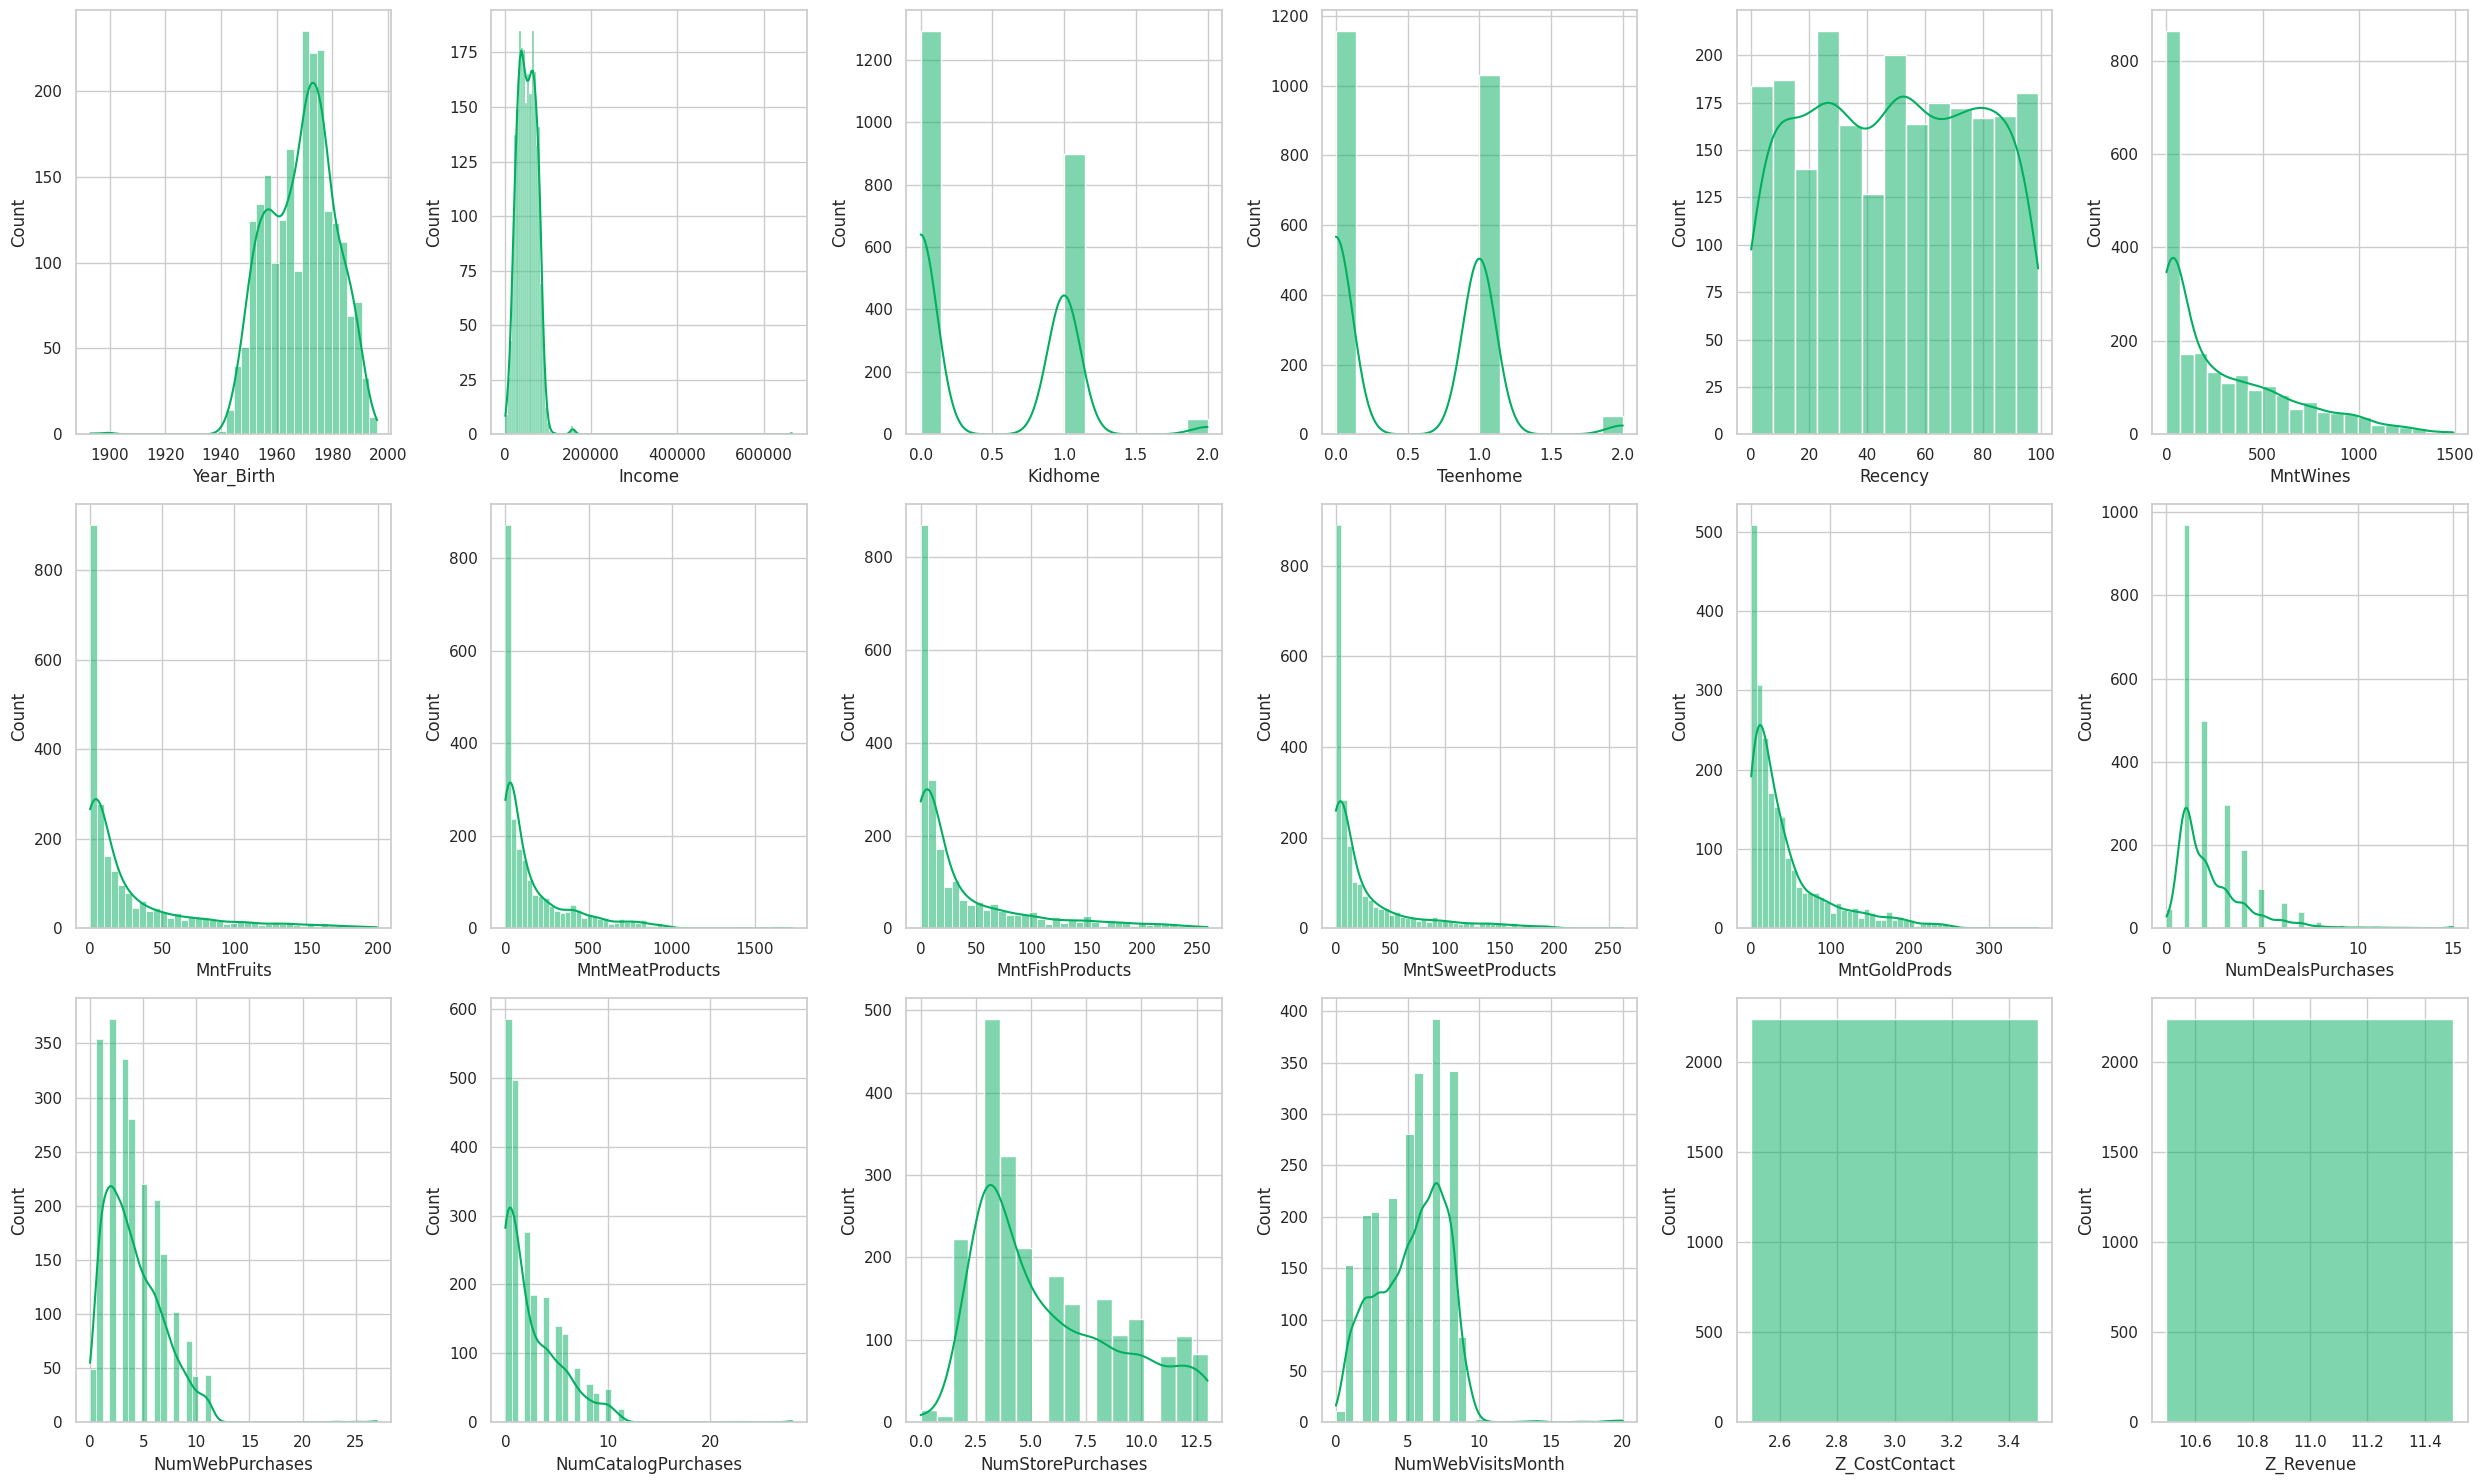

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(df[num_cols[i]], color='#00af5f', kde=True)
    plt.tight_layout()

In [ ]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist

<ipython-input-90-4ef11b00e882>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_val = round(skew(data, nan_policy="omit"),3)
<ipython-input-90-4ef11b00e882>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)
<ipython-input-90-4ef11b00e882>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_val = round(skew(data, nan_policy="omit"),3)
<ipython-input-90-4ef11b00e882>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtos

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Year_Birth,-0.350,0.713,Moderately Normal Distribution (Symmetric)
1,Income,6.759,159.274,Highly Positively Skewed
2,Kidhome,0.635,-0.781,Bimodal Distribution
3,Teenhome,0.407,-0.987,Bimodal Distribution
4,Recency,-0.002,-1.202,Normal Distribution (Symmetric)
5,MntWines,1.175,0.595,Highly Positively Skewed
6,MntFruits,2.101,4.039,Highly Positively Skewed
7,MntMeatProducts,2.082,5.502,Highly Positively Skewed
8,MntFishProducts,1.918,3.087,Highly Positively Skewed
9,MntSweetProducts,2.135,4.364,Highly Positively Skewed


Berdasarkan chart **Boxplot, Distribusi, dan Violin** diatas, dapat diketahui bahwa ada beberapa variabel yang memiliki **outlier** didalamnya dan beberapa memiliki **Skewed Distribution**. Berikut adalah beberapa variabel tersebut:

1. ***Normal distribution***
    - `Recency` Normal Distribution (Symmetric)
    - `Year_Birth` Moderately Normal Distribution (Symmetric)
    - `NumWebVisitsMonth` Moderately Normal Distribution (Symmetric)
    
2. ***Uniform distribution***  
    - `Z_CostContact` Uniform Distribution - Memiliki satu nilai saja
    - `Z_Revenue` Uniform Distribution - Memiliki satu nilai saja

3. ***Positive skewed distribution***
    - Income `Income`
    - Amount of Wines Products `MntWines`
    - Amount of Fruits Products `MntFruits`
    - Amount of Meats Products `MntMeatProducts`
    - Amount of Fish Products `MntMeatProducts`
    - Amount of Sweet Products `MntSweetProducts`
    - Amount of Golds Products `MntGoldProds`
    - Number Deals Purchases `NumDealsPurchases`
    - Number Web Purchases `NumWebPurchases`
    - Number Catalog Purchases `NumCatalogPurchases`
    - Number Store Purchases `NumStorePurchases`

4. ***Bimodal distribution***
    - Number of small children  in customer's household `Kidhome`
    - Number of teenagers in customer's household `Teenhome`

**Rekomendasi pada data pre-processing:**

Data yang mengalami `Positive Skewed Distribution` dilakukan `Log Transformation` sehingga data bisa menjadi normal distribution

COUNTPLOT

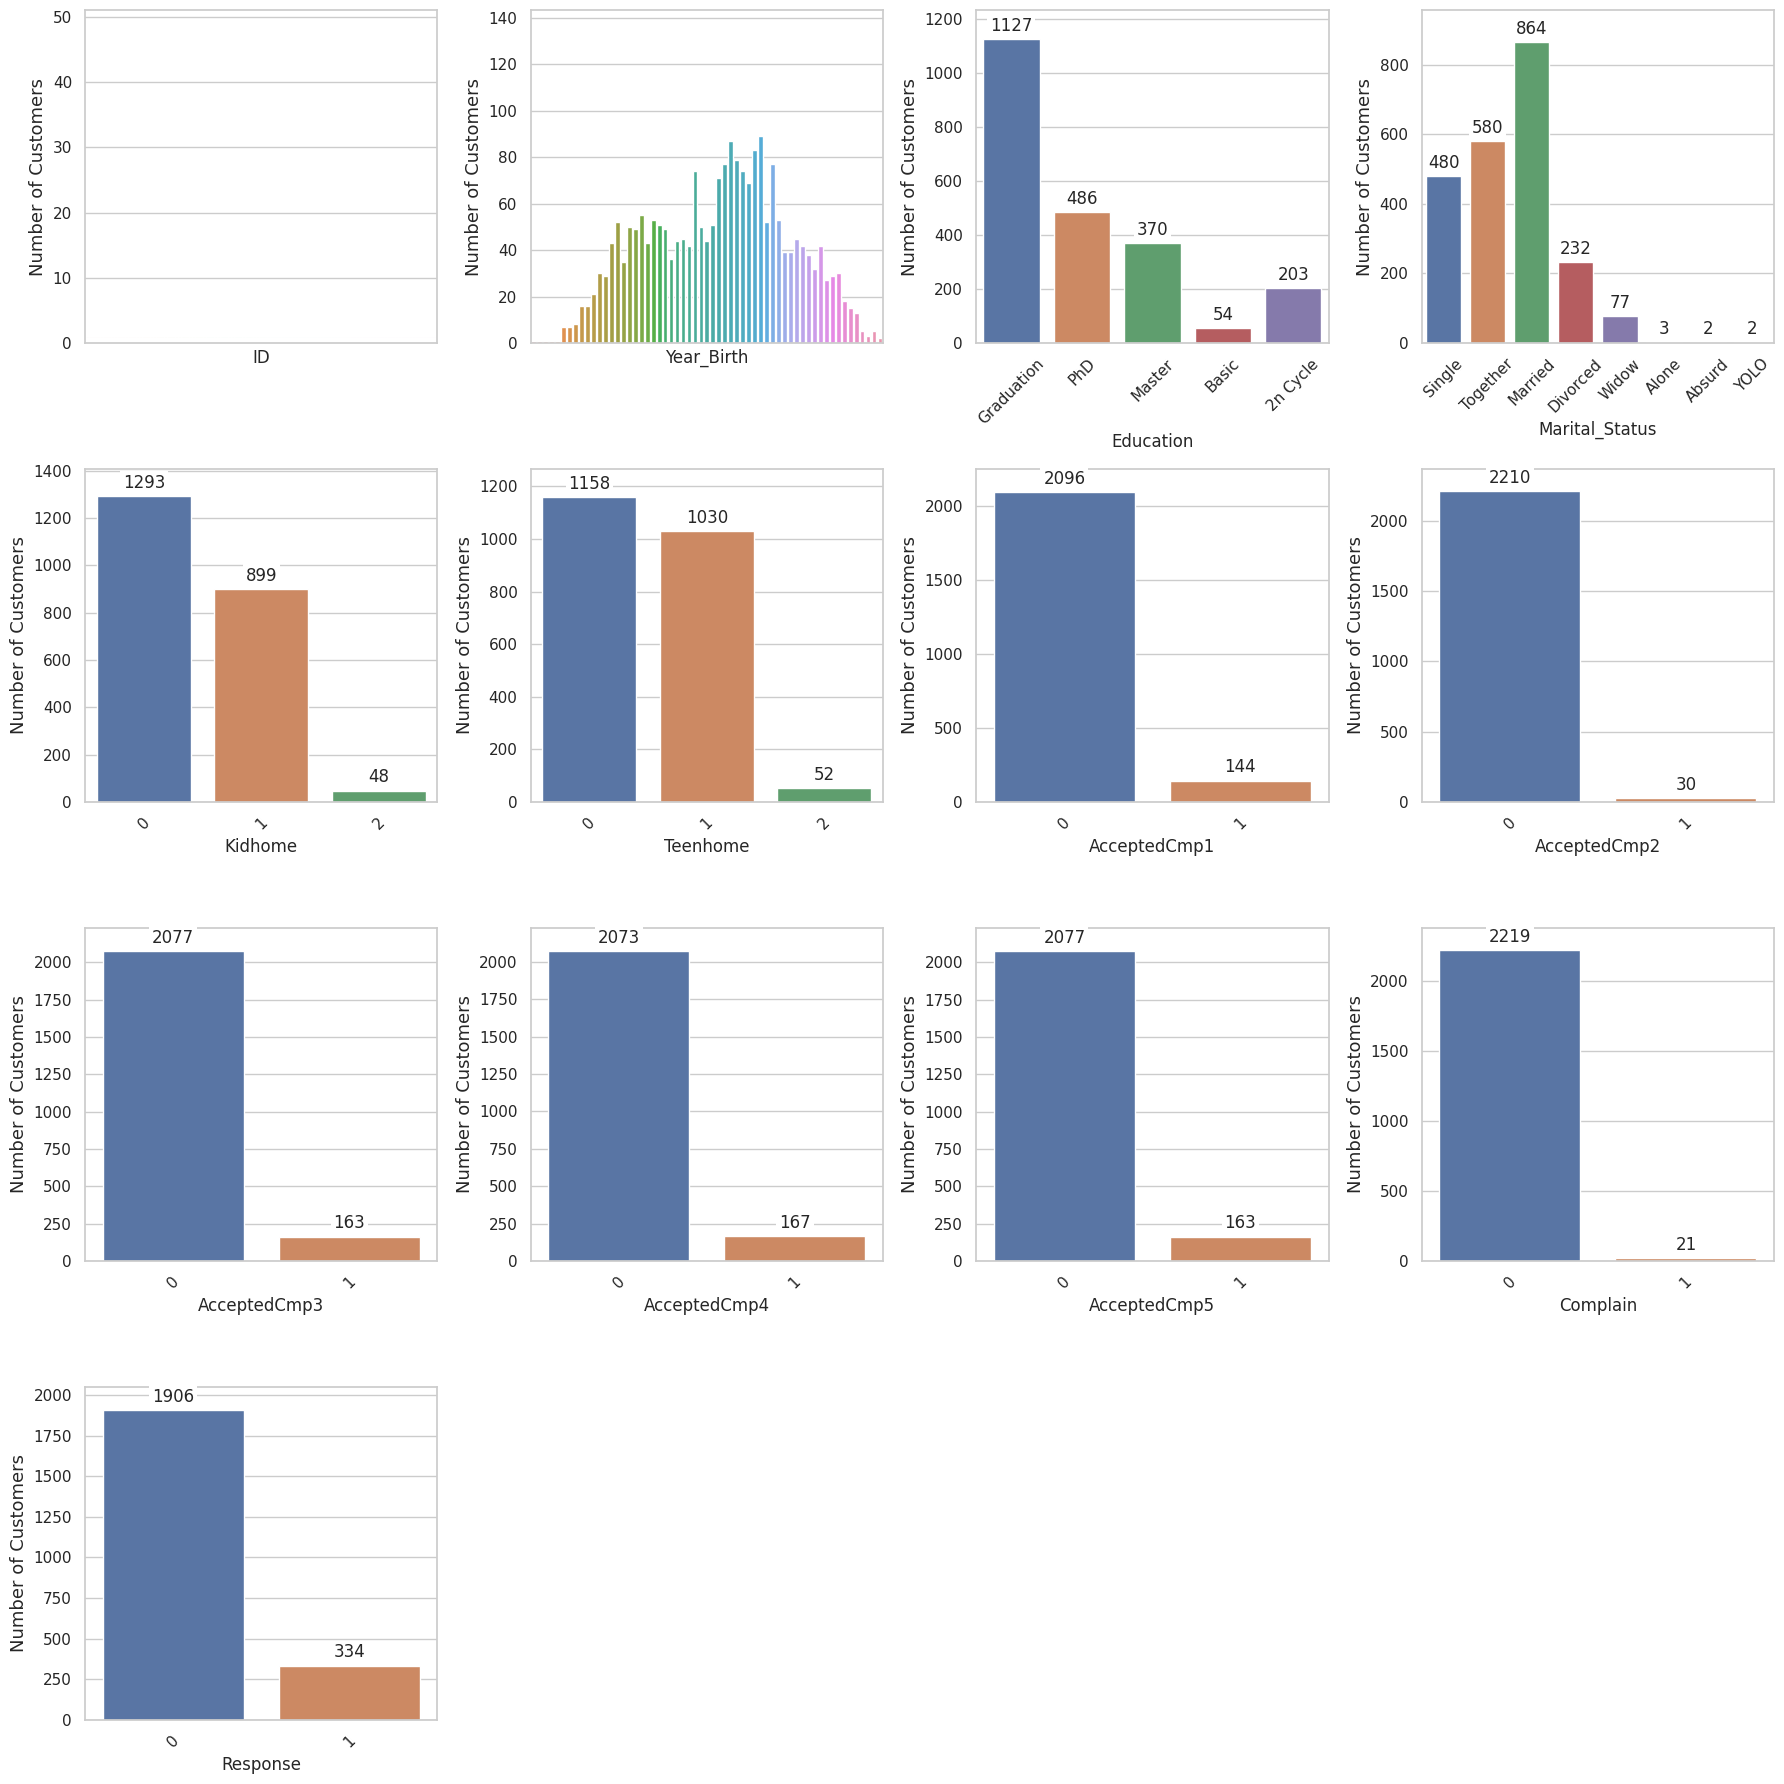

In [ ]:
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
cat.insert(4, "Kidhome")
cat.insert(5, "Teenhome")

n=4
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], orient='h')
    if cat[i] not in ["ID", "Year_Birth"]:
        for i in bar.patches:
            bar.annotate(int(i.get_height()),
                    xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor="None", pad=2))
    else :
        plt.xticks([])
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

**Observations:**
- Terlalu banyak kategori pada kolom `ID`, `Year_Birth`
- Kolom `Education` dan `Marital_Status` memiliki beberapa kategori yang valuenya sama dan ambigu.
    - Kategori `Education`, "2n Cycle" dan "Master" memliki arti yang sama.
    - Kategori `Education`: customer mayoritas memiliki kategori pendidikan `Graduation` sebanyak 1127 orang, namun nilainya sangat besar di banding yang lain
    - Dalam kategori `Marital Status`, customer mayoritas sudah menikah (Married) 864 orang
    - Dalam kategori `Marital Status`, "Single" dan "Alone" memiliki arti yang sama.
    - Dalam kategori `Marital Status`, "Together" dan "Married" memiliki arti yang sama.
    - Dalam kategori `Marital Status`, ada beberapa data yang tidak jelas apa yang dimaksud yaitu "Absurd" dan "YOLO", maka disarankan digabung dan diganti "Others".
- Kolom `Kidhome` dan `Teenhome` mayoritas customer tidak memiliki anak dan remaja (value 0)
- Kolom `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3 ,AcceptedCmp4, AcceptedCmp5, Complain, dan Response` value didominasi dengan value 0 (Tidak Response / Complain)
- Target yang kita miliki ada pada kolom `Respon`, yang mana memiliki ketimpangan yang sangat tinggu (Imbalanced Data),
    - Tidak merespon = 1906
    - Merespon = 334

**Hal yang harus dilakukan saat Data Pre-Processing adalah:**

- Kolom `ID` di drop untuk proses modelling
- Dari kolom `Year_Birth` dibuat kolom baru yaitu kolom `Age` yang menunjukkan umur seorang customer.
- Akan dilakukan `replace data / menyatukan yang memiliki arti yang sama` agar mengurangi jumlah dimensi maupun `redudansi pada data`
    - Kategori `Education`, "2n Cycle" dan "Master" memliki arti yang sama.
    - Dalam kategori `Marital Status`, Customer mayoritas sudah menikan (Married) 864 orang
    - Dalam kategori `Marital Status`, "Single" dan "Alone" memiliki arti yang sama.
    - Dalam kategori `Marital Status`, "Together" dan "Married" memiliki arti yang sama.
    - Dalam kategori `Marital Status`, ada beberapa data yang tidak jelas apa yang dimaksud yaitu "Absurd" dan "YOLO", maka disarankan digabung dan diganti "Others".
- Melakukan `Label Encoding` pada kolom `Education`.
- Melakukan `One Hot Encoding (OHE)` pada kolom `Marital_Status`.
- Pada kolom `Response`,  Sebaran kategori yang timpang pada feature mengindikasikan ketidakgunaan feature. Pada target, menyebabkan proses Machine Learning gagal. Oleh karena itu, perlu dilakukan `Sampling Data (Undersampling/Oversampling/Combinded/SMOTE/dll)`

# Multivariate Analysis

## Specific Correlation with Target **(Response)**

<Axes: >

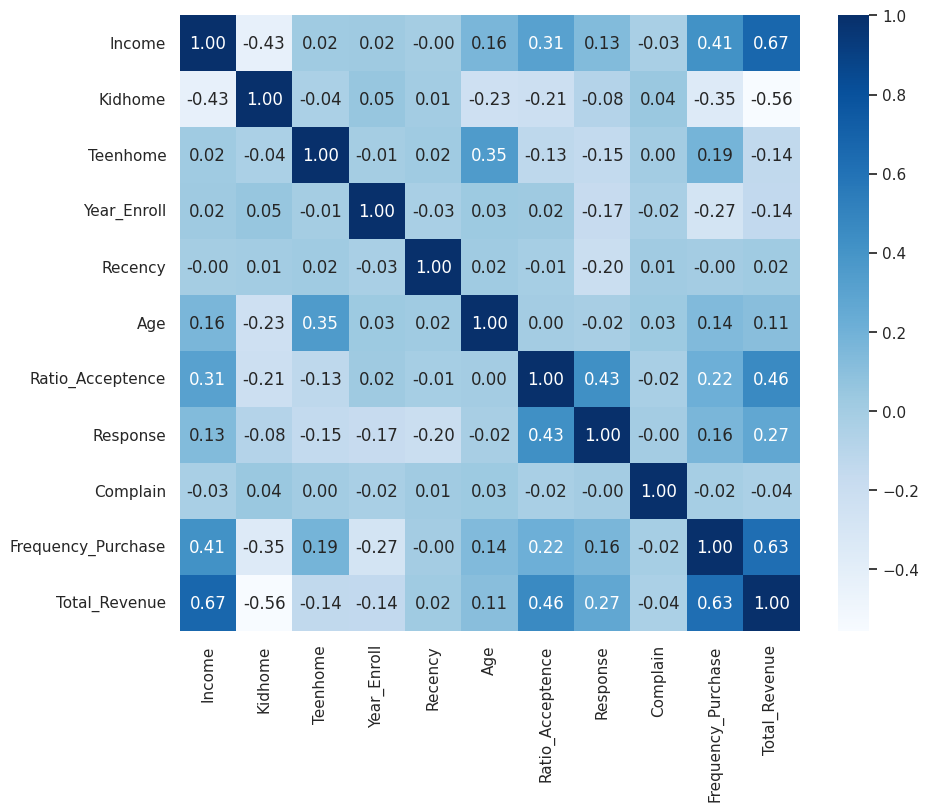

In [ ]:
# Making Heatmap
nums = ['Income', 'Kidhome', 'Teenhome', 'Year_Enroll', 'Recency', 'Age', 'Ratio_Acceptence', 'Response', 'Complain', 'Frequency_Purchase', 'Total_Revenue']

plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pilih fitur numerik
numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Ratio_Acceptence', 'Response', 'Complain', 'Frequency_Purchase', 'Total_Revenue']
df_numeric = df[numeric_features]

# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Ganti NaN dengan rata-rata setelah normalisasi
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Terapkan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data_imputed)

# pca_result sekarang hanya memiliki 2 fitur
print("Shape of original data:", df_numeric.shape)
print("Shape of data after PCA:", pca_result.shape)

Shape of original data: (2240, 10)
Shape of data after PCA: (2240, 2)


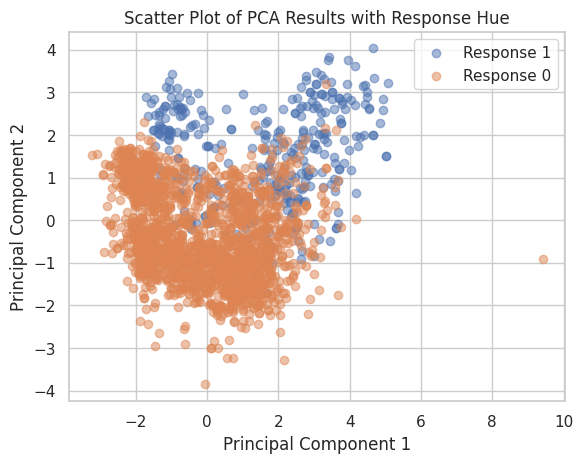

In [ ]:
import matplotlib.pyplot as plt

# Contoh hasil PCA
x = pca_result[:, 0]  # Komponen utama pertama
y = pca_result[:, 1]  # Komponen utama kedua

# Kategori untuk warna (hue) berdasarkan kolom 'Response'
response_categories = df['Response']

# Unikkan nilai 'Response'
unique_responses = response_categories.unique()

# Scatter plot dengan warna berbeda untuk setiap kategori 'Response' dan tambahkan legend
for response in unique_responses:
    indices = response_categories == response
    plt.scatter(x[indices], y[indices], label=f'Response {response}', alpha=0.5)

plt.title('Scatter Plot of PCA Results with Response Hue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Tambahkan legend
plt.legend()
plt.show()


Multivariate Numeric:
- **Tidak terdapat multicollinearity** antara kolom sehingga **semua kolom dapat dipertahankan** atau tidak perlu dieliminasi.
- Terdapat beberapa kolom numerik yang berkorelasi cukup kuat dengan target (`Response`) baik berkorelasi positif maupun negatif.
- Kolom numerik yang memiliki **korelasi positif** cukup kuat dengan **target (`Response`)** yaitu **Ratio_Acceptence(0.40), Total_Revenue(0.27), Total_Purchase(0.16), dan Income(0.13)**.
- Kolom numerik yang memiliki **korelasi negatif** cukup kuat dengan **target (`Response`)** yaitu **Recency(-0.20), Year_Enroll(-0.17), dan Teenhome(-0.15).**
- **Target (`Response`) memiliki korelasi yang terkuat dengan Total_Campaign**.
- **Penggunaan PCA** dimaksudkan **untuk mengetahui pola atau cluster** dari features yang ada. Berdasarkan hasil visualisasi scatter plot, **plot tidak membentuk garis lurus** melainkan bentuk yang lain hampir seperti kurva **sehingga plot ini menunjukkan hubungan nonliar**. Dengan demikian maka **ketika melakukan permodelan lebih baik menggunakan model yang nonlinear**.

In [ ]:
from scipy.stats import chi2_contingency

def cat_vs_resp(column):
    resp_by = df.groupby(column)['Response'].value_counts(normalize=True).to_frame()
    resp_by.columns = ['Proportion']
    resp_by_pvt = resp_by.reset_index().pivot(columns='Response', index=column, values='Proportion')
    display(resp_by_pvt * 100)

    contingency = df.groupby([column, 'Response']).agg({'Response': 'count'}).rename(columns={'Response': 'count'}).reset_index().pivot(index=column, columns='Response', values='count')
    stats, p, dof, expected = chi2_contingency(contingency)
    if p < 0.5:
        print(f'Column {column} has a strong relationship with the Response Label.')
    else:
        print(f'Column {column} has a weak relationship with the Response Label.')

    resp_by_pvt.plot(kind='bar', stacked=True, ylabel='Proportion')
    plt.title(f'Response Proportion by {column}')
    plt.show()


In [ ]:
df.select_dtypes(include = 'object').columns

Index(['Education', 'Marital_Status', 'Age_Category', 'Income_Category'], dtype='object')

Response,0,1
Education,,
2n Cycle,89.162562,10.837438
Basic,96.296296,3.703704
Graduation,86.512866,13.487134
Master,84.594595,15.405405
PhD,79.218107,20.781893


Column Education has a strong relationship with the Response Label.


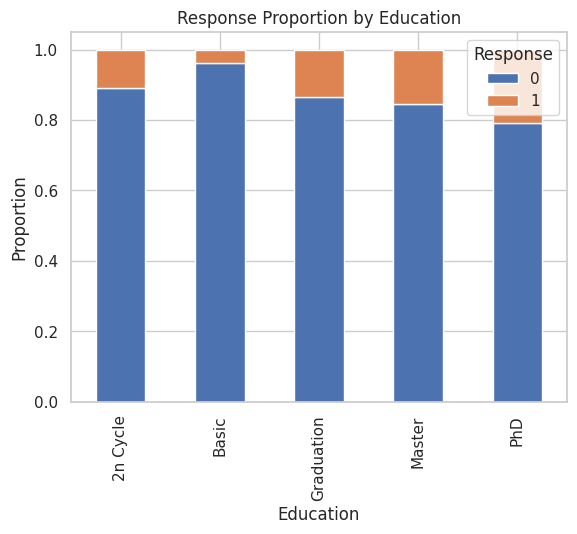

Response,0,1
Marital_Status,,
Absurd,50.000000,50.000000
Alone,66.666667,33.333333
Divorced,79.310345,20.689655
Married,88.657407,11.342593
Single,77.916667,22.083333
Together,89.655172,10.344828
Widow,75.324675,24.675325
YOLO,50.000000,50.000000


Column Marital_Status has a strong relationship with the Response Label.


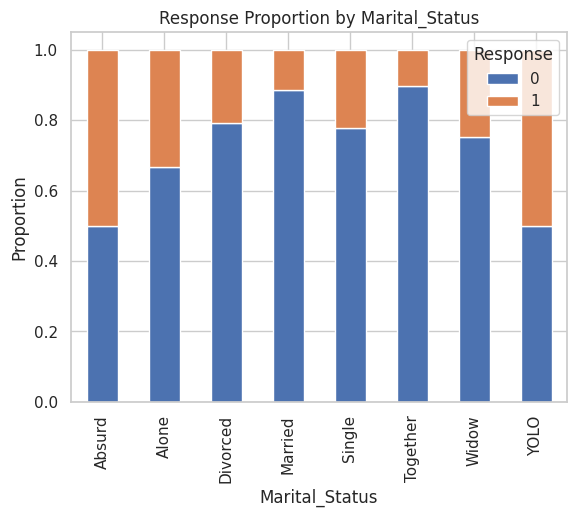

Response,0,1
Age_Category,,
Dewasa,84.133791,15.866209
Lansia,86.163522,13.836478
Remaja,85.833333,14.166667


Column Age_Category has a strong relationship with the Response Label.


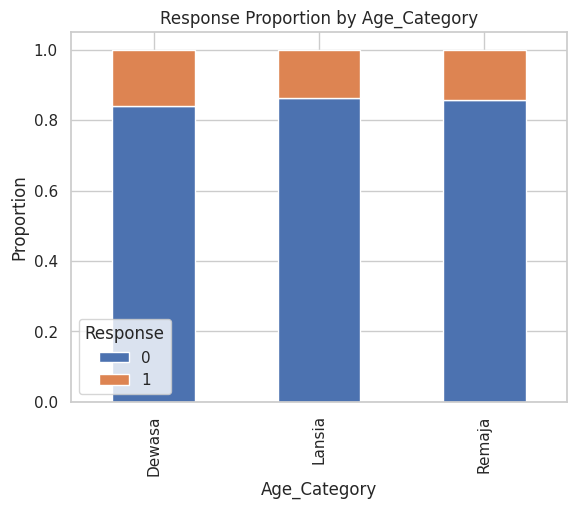

Response,0,1
Income_Category,,
High,81.713781,18.286219
Low,89.530686,10.469314
Medium,87.545126,12.454874


Column Income_Category has a strong relationship with the Response Label.


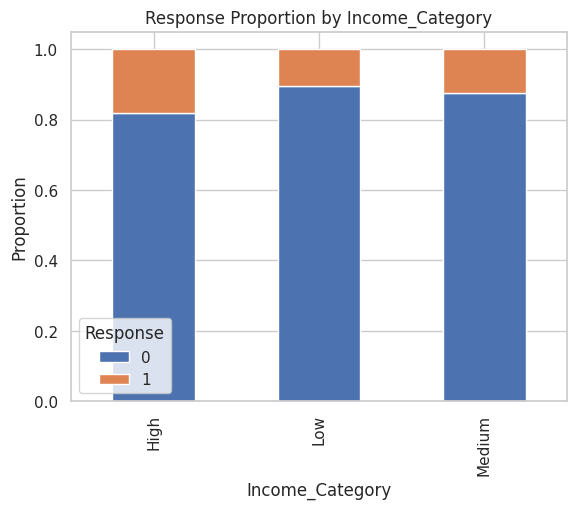

In [ ]:
for col in df.select_dtypes(include='object').columns:
    cat_vs_resp(col)

Multivariate Categorical:
- Analisis correlation categorical data dilakukan dengan menggunakan fungsi Contingency. Berdasarkan perhitungan tersebut semua data categorical memiliki hubungan yang kuat dengan target (`Response`).
- Semua data categorical yang memiliki korelasi negatif dengan target (`Response`).

# Bivariate Analysis

Bivariate analysis dilakukan untuk mengetahui bagaimana pengaruh category dengan features yang memiliki hubungan yang cukup kuat dengan respone dan dikelompokkan berdasarkan response

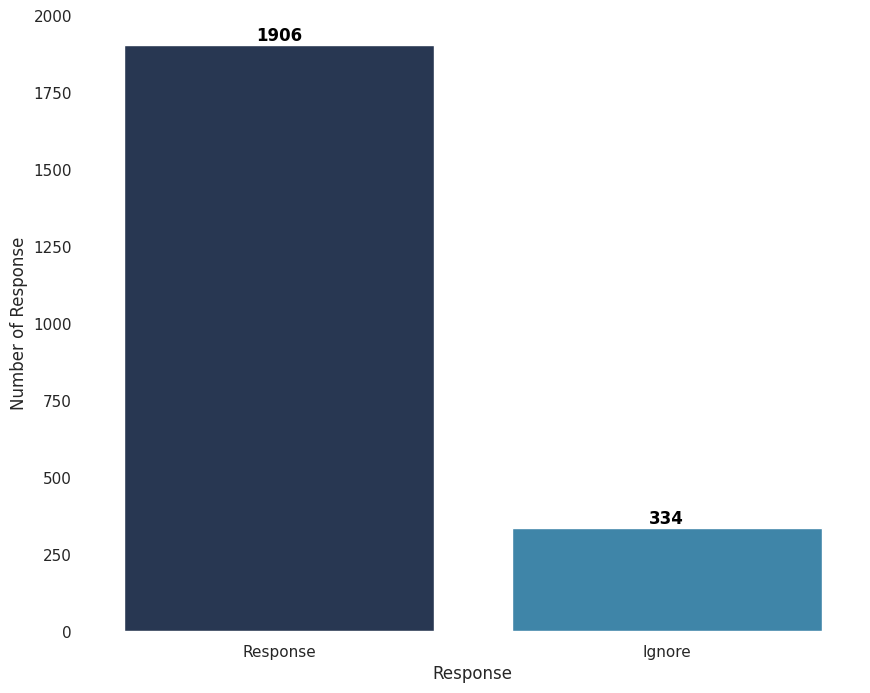

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Count Plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
plot_sns = sns.countplot(x='Response',
                         data=df,
                         palette=custom_color)

# Display count values on top of each bar
for i in range(len(df['Response'].unique())):
    count = df['Response'].value_counts().iloc[i]
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Customize x-tick
xtick_positions = [1, 0]
xtick_labels = ['Response', 'Ignore']

# Set custom x-tick positions and labels
plot_sns.set_xticks(range(len(xtick_positions)))
plot_sns.set_xticklabels(xtick_labels)

# Set label for y-axis
plt.ylabel('Number of Response')

# Showing plot
plt.show()


## Education

### Ratio Acceptence

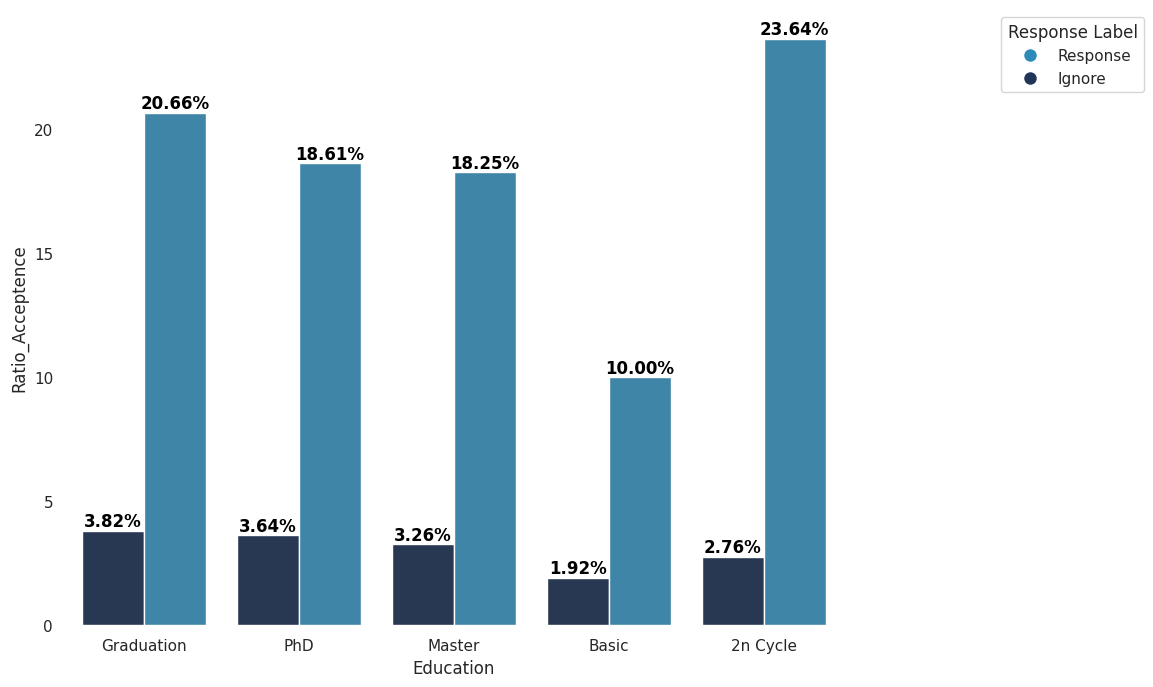

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Education',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Pada kategori pendidikan, Basic memiliki ratio acceptence yang terkecil yaitu dengan proporsi response sebesar 10% dan ignore sebesar 1.92% sehingga total ratio acceptencenya kurang dari 20% sedangkan di kategori pendidikan lainnya memiliki total ratio acceptence lebih dari 20%. Walaupun proporsi ignore terkecil pada last campaign daripada yang lainnya. Dengan demikian, tim marketing disarankan untuk dapat meningkatkan response dari pendidikan basic

#### Detail Analisis

In [ ]:
basic_df = df[df['Education'] == 'Basic']
basic_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Year_Enroll,Age,Age_Category,Income_Category,Ratio_Acceptence,Frequency_Purchase,Total_Revenue
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,3,11,0,2012,37,Dewasa,Low,0.0,14,61
105,8373,1979,Basic,Together,24594.0,1,0,2013-12-10,94,1,...,3,11,0,2013,34,Dewasa,Low,0.0,10,29
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,...,3,11,0,2012,37,Dewasa,Low,0.0,14,29
184,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,...,3,11,0,2014,52,Lansia,Low,0.0,12,43
190,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,...,3,11,0,2012,35,Dewasa,Low,20.0,11,80


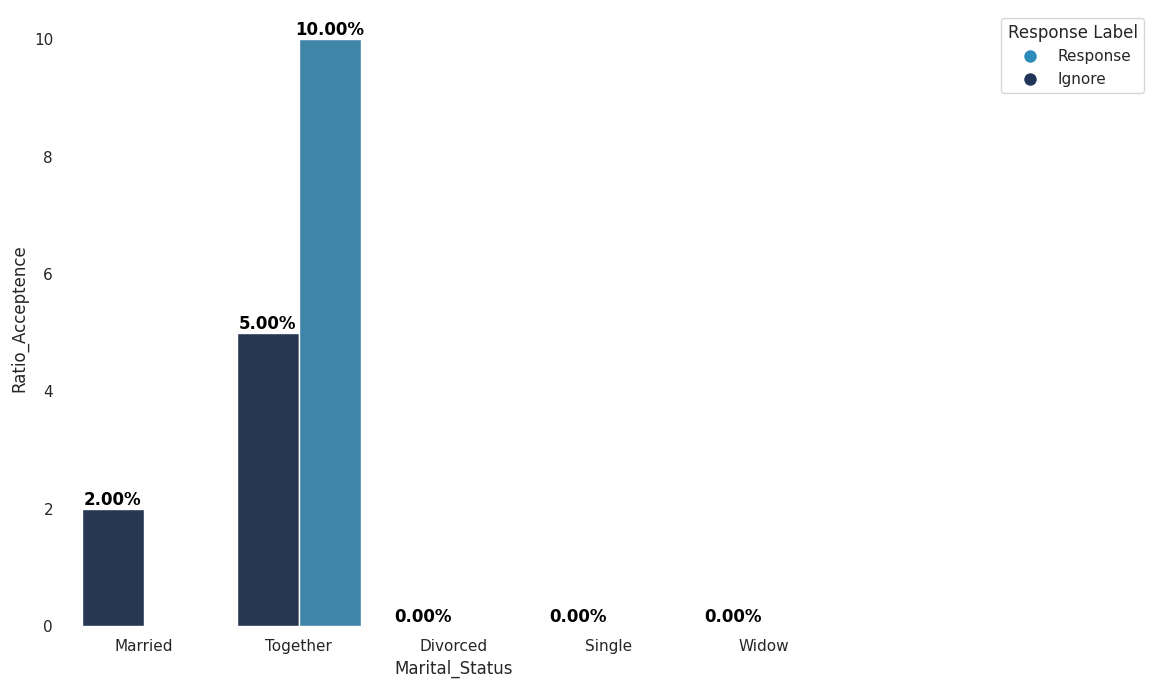

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Marital_Status',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = basic_df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Ketika ditelisik lebih dalam, untuk kategori pendidikan basic hanya marital status together saja yang memiliki ratio acceptence tertinggi yaitu 10%. Bukan 15% karena 5% nya mengabaikan campaign terakhir. Perlu dicari tahu apakah kategori lainnya mempengaruhi rendahnya ratio acceptence tersebut.

In [ ]:
ntogether_basic_df = basic_df[(basic_df['Marital_Status'] != 'Together') | (basic_df['Response'] == 0)]
ntogether_basic_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Year_Enroll,Age,Age_Category,Income_Category,Ratio_Acceptence,Frequency_Purchase,Total_Revenue
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,3,11,0,2012,37,Dewasa,Low,0.0,14,61
105,8373,1979,Basic,Together,24594.0,1,0,2013-12-10,94,1,...,3,11,0,2013,34,Dewasa,Low,0.0,10,29
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,...,3,11,0,2012,37,Dewasa,Low,0.0,14,29
184,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,...,3,11,0,2014,52,Lansia,Low,0.0,12,43
190,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,...,3,11,0,2012,35,Dewasa,Low,20.0,11,80


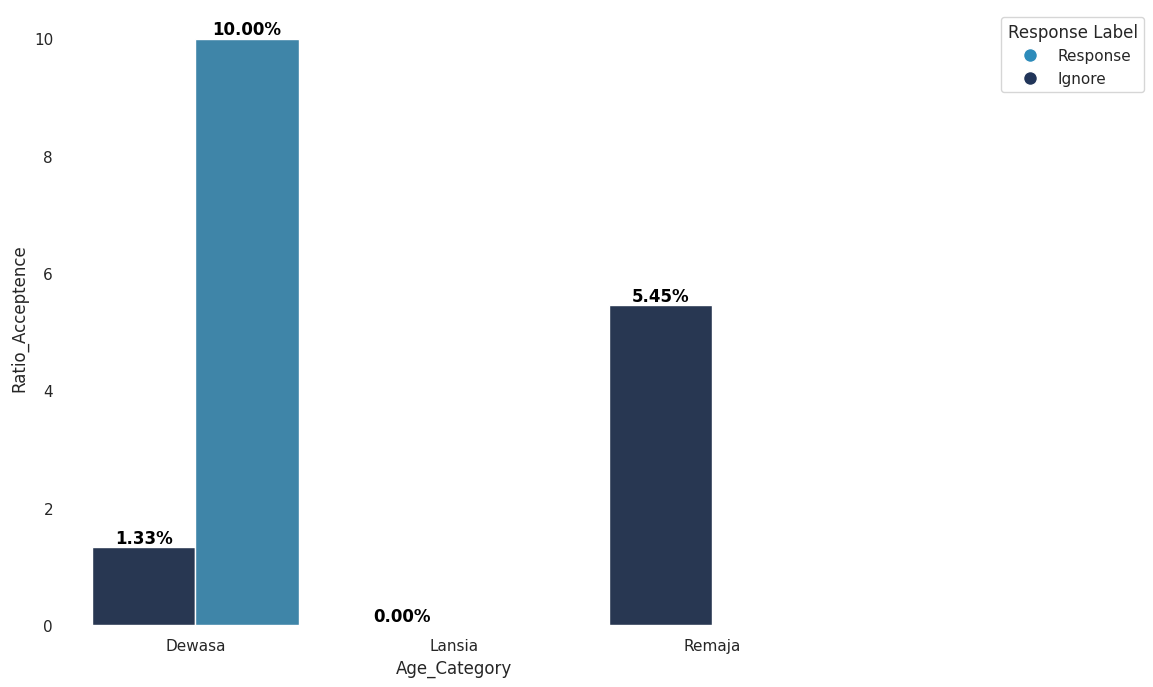

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Age_Category',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = basic_df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Ketika ditelisik lebih dalam, untuk kategori pendidikan basic hanya marital status together saja yang memiliki ratio acceptence tertinggi yaitu 10%. Bukan 15% karena 5% nya mengabaikan campaign terakhir.
Pada pengamatan yang lebih detail dari selain 10% ratio acceptence response berdasarkan age category ternyata hanya age category dewasa yang memiliki ratio acceptence response tertinggi yaitu 10%. Bukan 11.33% karena 1.33% nya mengabaikan campaign terakhir. Perlu dicari tahu apakah kategori lainnya mempengaruhi rendahnya ratio acceptence tersebut.

In [ ]:
ndewasa_ntogether_basic_df = ntogether_basic_df[(ntogether_basic_df['Age_Category'] != 'Dewasa') | (ntogether_basic_df['Response'] == 0)].reset_index(drop=True)
ndewasa_ntogether_basic_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Year_Enroll,Age,Age_Category,Income_Category,Ratio_Acceptence,Frequency_Purchase,Total_Revenue
0,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,3,11,0,2012,37,Dewasa,Low,0.0,14,61
1,8373,1979,Basic,Together,24594.0,1,0,2013-12-10,94,1,...,3,11,0,2013,34,Dewasa,Low,0.0,10,29
2,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,...,3,11,0,2012,37,Dewasa,Low,0.0,14,29
3,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,...,3,11,0,2014,52,Lansia,Low,0.0,12,43
4,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,...,3,11,0,2012,35,Dewasa,Low,20.0,11,80


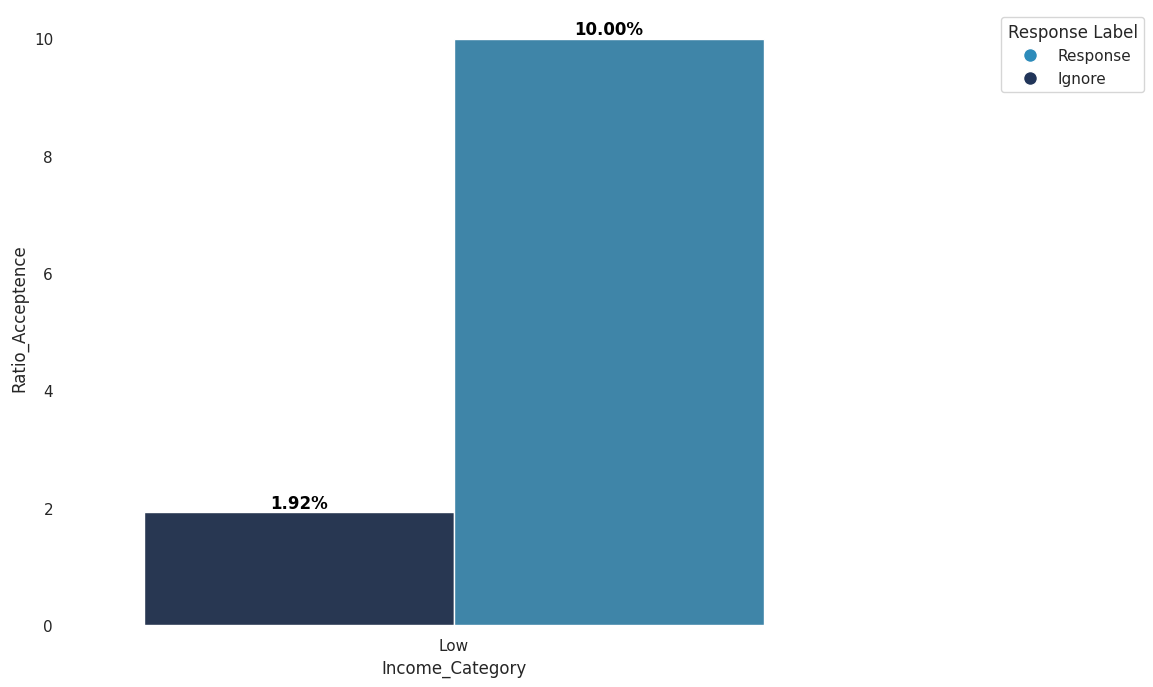

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Income_Category',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = basic_df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Ketika ditelisik lebih dalam, untuk kategori pendidikan basic hanya marital status together saja yang memiliki ratio acceptence tertinggi yaitu 10%. Bukan 15% karena 5% nya mengabaikan campaign terakhir.
Pada pengamatan yang lebih detail dari selain 10% ratio acceptence response berdasarkan age category ternyata hanya age category dewasa yang memiliki ratio acceptence response tertinggi yaitu 10%. Bukan 11.33% karena 1.33% nya mengabaikan campaign terakhir.
Setelah diamati berdasarkan income categorynya, ternyata secara keseluruhan pada kategori pendidikan basic dengan marital status selain together dan age category selain dewasa memiliki income category low. Sehingga, tim marketing perlu memperhatikan strategi marketing yang akan diterapkan pada segmen ini.

### Frequency Purchase

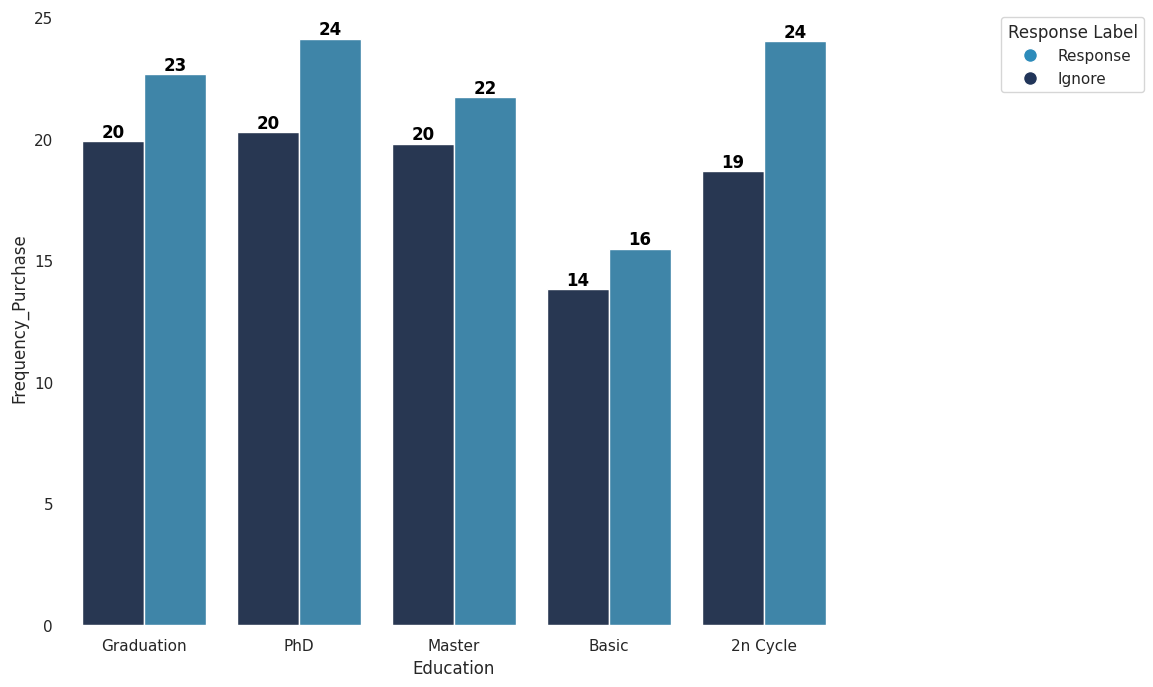

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Education',
                       y = 'Frequency_Purchase',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Pada kategori pendidikan, Basic memiliki Frequency Purchase yang terkecil yaitu dengan proporsi response sebesar 16 dan ignore sebesar 14 sehingga total Total Frequency Purchase pendidikan basic kurang dari 40 sedangkan di kategori pendidikan lainnya memiliki total ratio acceptence lebih dari 40, meskipun nilainya sudah di atas rata-rata frequency purchase secara keseluruhan yaitu 20. Walaupun proporsi ignore terkecil pada last campaign daripada yang lainnya. Dengan demikian, tim marketing disarankan untuk dapat meningkatkan response dari pendidikan basic.

### Total Revenue

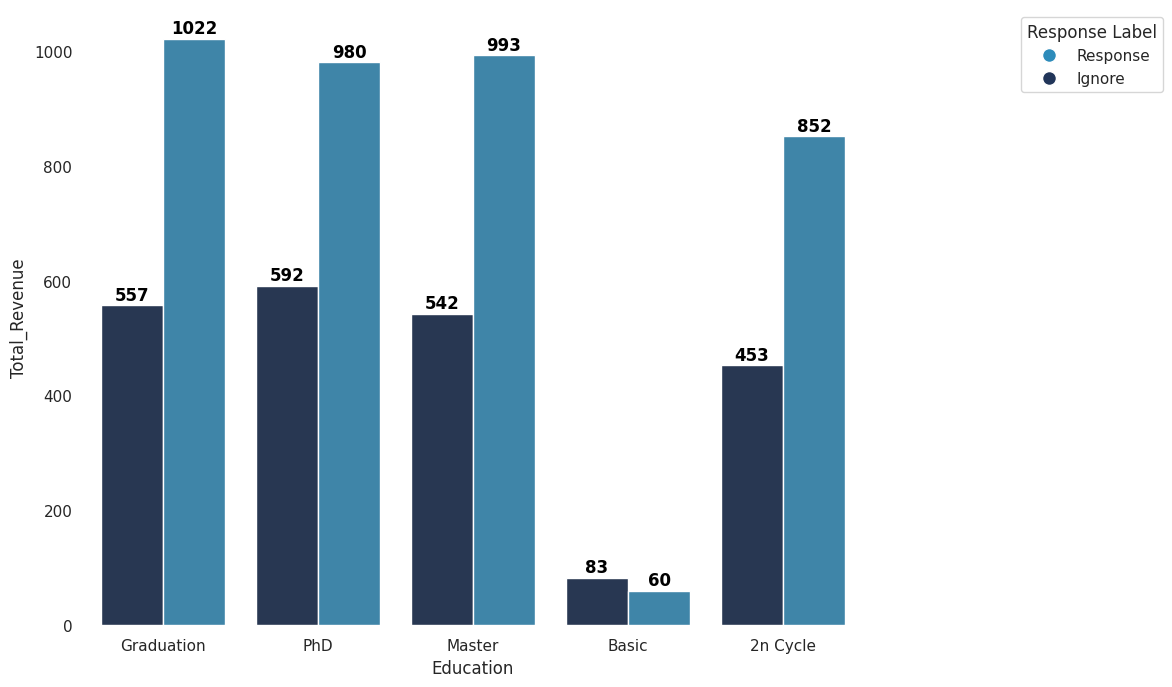

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Education',
                       y = 'Total_Revenue',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Pada kategori pendidikan, perusahaan memperoleh revenue paling kecil dari kategori Basic yaitu 60 dollar dari response dan 83 dollar dari ignore sebesar 14 sehingga Total Revenue pendidikan basic 150 dollar sedangkan di kategori pendidikan lainnya memiliki total revenue lebih dari 1000 dollar. Tetapi terdapat hal menrik pada kategori basic karena total revenue ignore lebih tinggi 14 dollar dari yang response.

### Recency

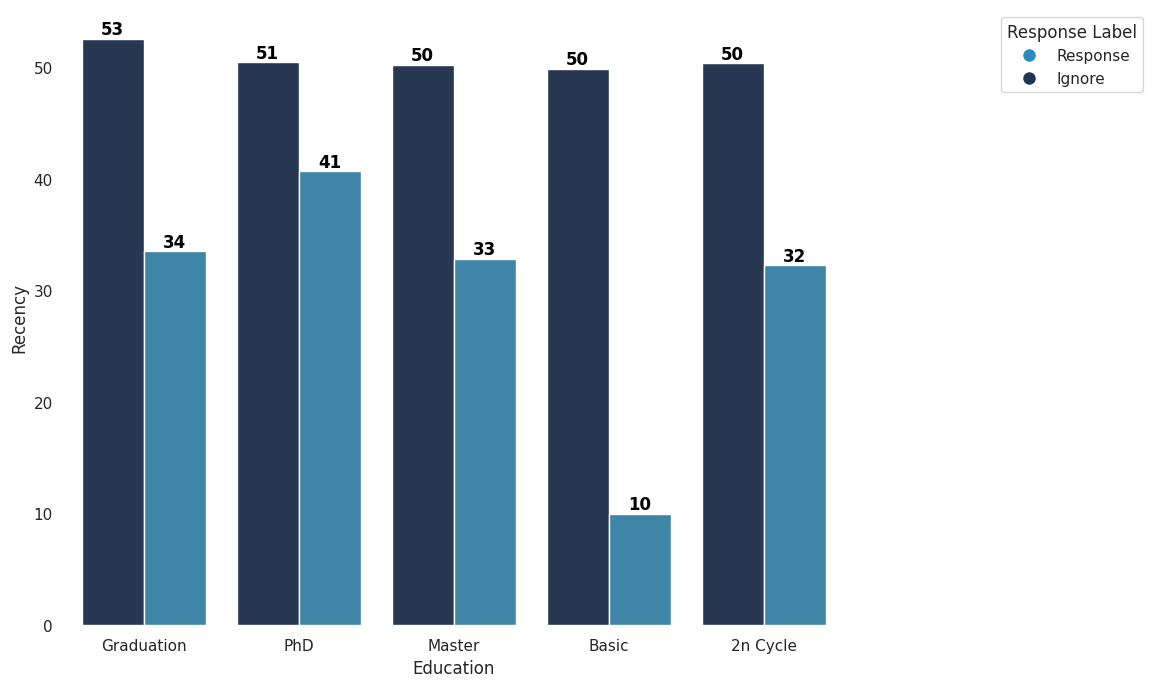

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Education',
                       y = 'Recency',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Pada kategori pendidikan, Basic memiliki Recency yang terkecil yaitu dengan proporsi response selama 10 hari dan ignore selama 50 hari sehingga Total Recency pendidikan basic kurang dari 70 hari sedangkan di kategori pendidikan lainnya memiliki total Recency lebih dari 70 hari. Dengan demikian dapat ditarik kesimpulan bahwa kategori basic masih melakukan pembelian pada 50 hari terakhir.

General Analisis Response berdasarkan Education

Berdasarkan analisis bivariate dengan beberapa parameter seperti Ratio Acceptence, Frequency Purchase, Total Revenue, dan Recency kategori Basic memiliki insight yang menarik dimana:
1. Memiliki Ratio Acceptence, Frequency Purchase, Total Revenue sehingga menjadi peluang positif yang dapat dikenai perlakukan strategi marketing untuk meningkatkan Response dan revenue perusahaan. Selain itu, dengan Recency yang rendah yang ada dapat dijadikan pertimbangan dalam memberikan strategi marketing pada kategori ini.
2. Penerapan strategi marketing yang lebih spesifik perlu dilakukan untuk mengurangi cost dengan melakukan analisis berdasarkan kategori yang lainnya seperti Age_Category, Marital_Status, hingga Income_Category atau bahkan lebih spesifik lagi.

## Age Category

### Ratio Acceptence

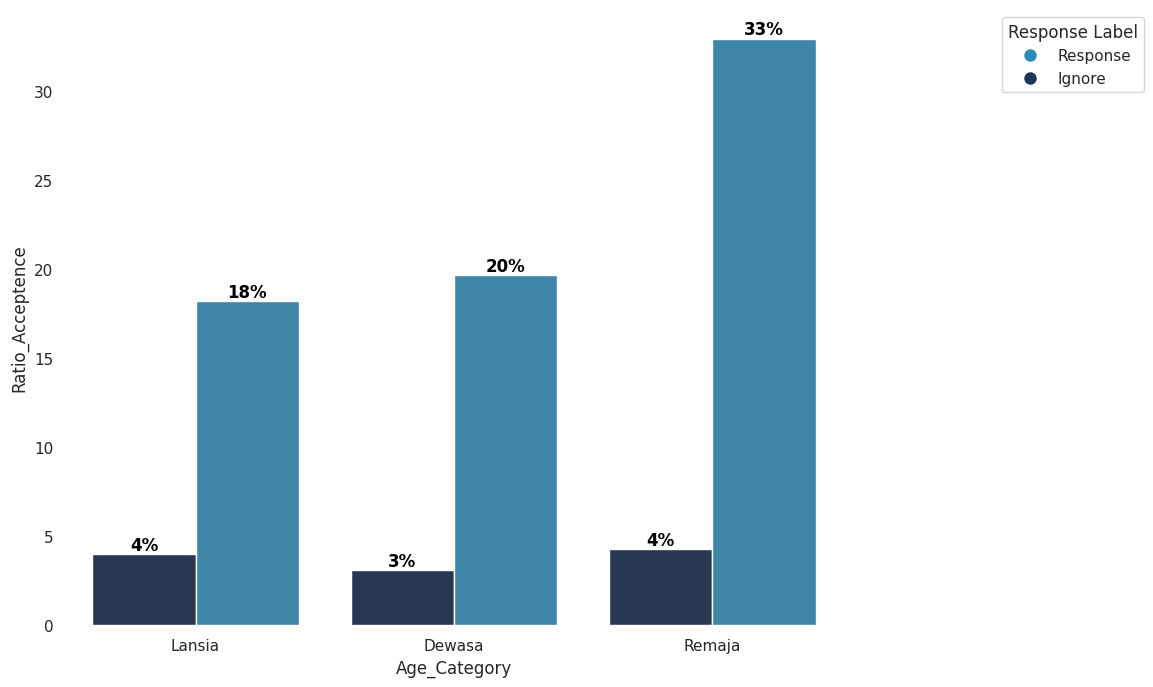

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Age_Category',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}%', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


Pada Age Category, Lansia memiliki ratio acceptence yang terkecil yaitu dengan proporsi response sebesar 18% dan ignore sebesar 4% sehingga total ratio acceptencenya kurang dari 25% sedangkan di kategori usia lainnya memiliki total ratio acceptence lebih dari 25%.

### Frequency Purchase

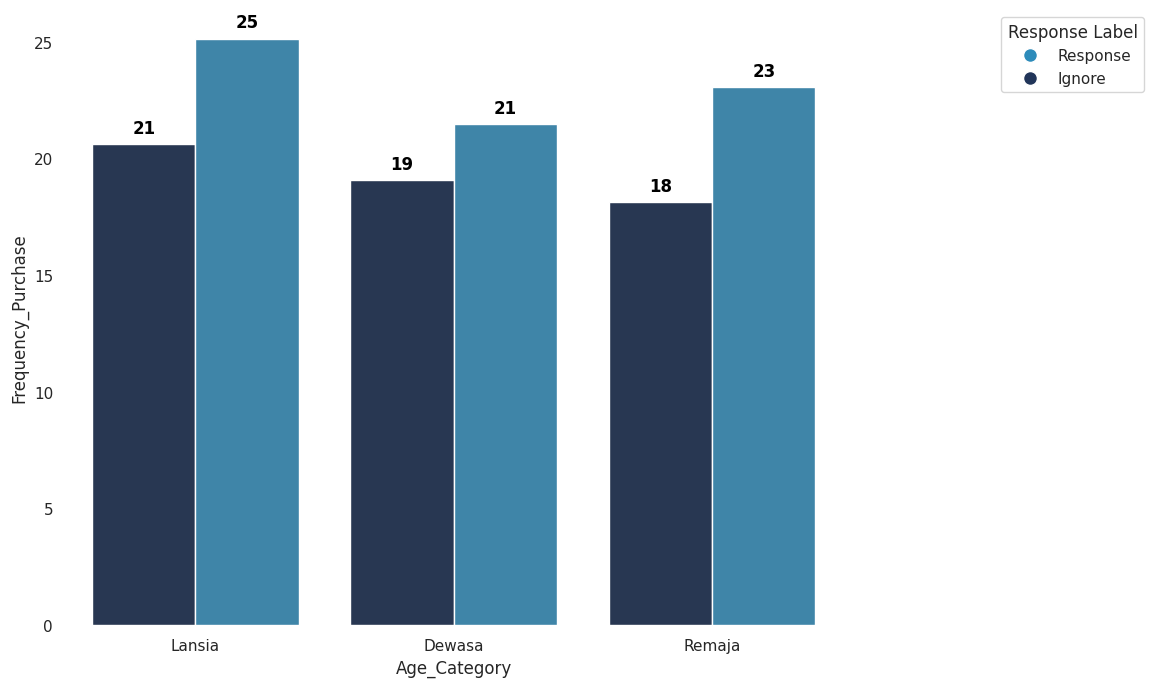

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Age_Category',
                       y = 'Frequency_Purchase',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.3, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Total Revenue

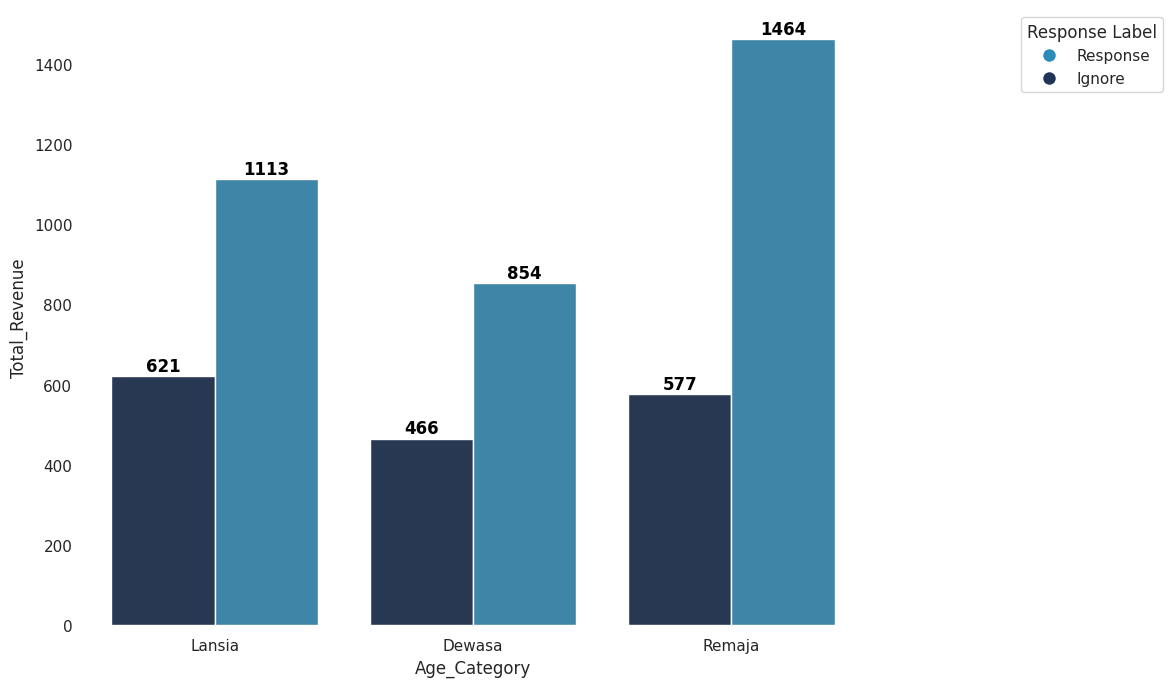

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Age_Category',
                       y = 'Total_Revenue',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Recency

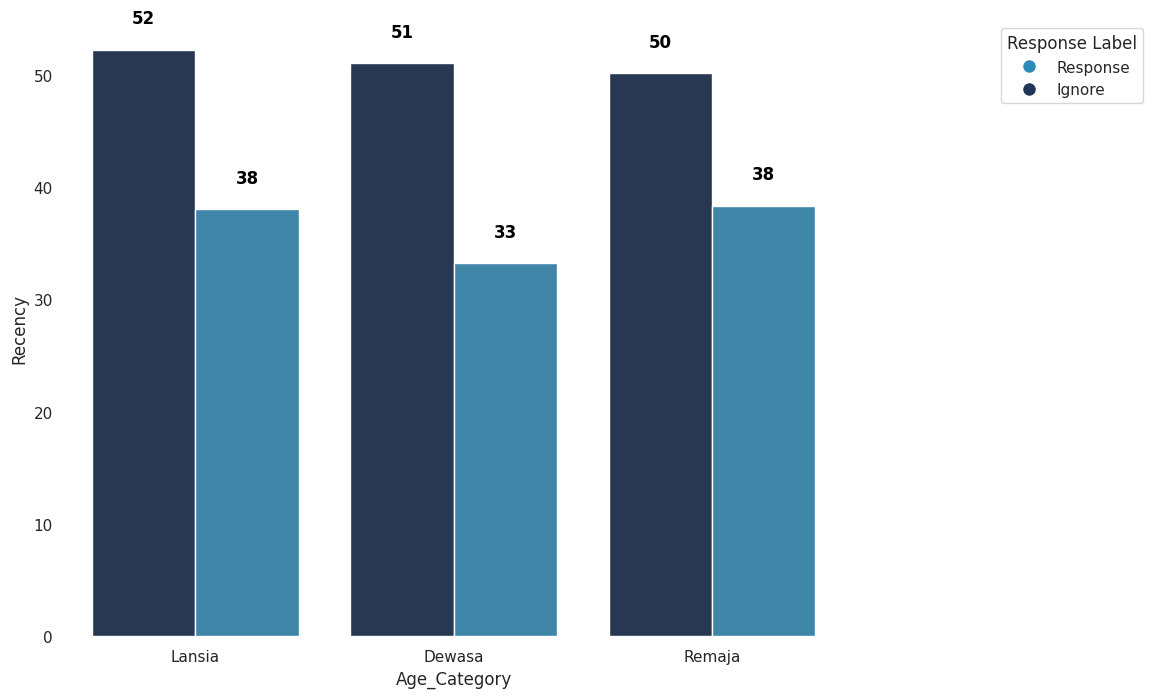

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Age_Category',
                       y = 'Recency',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


## Marital Status

### Ratio Acceptence

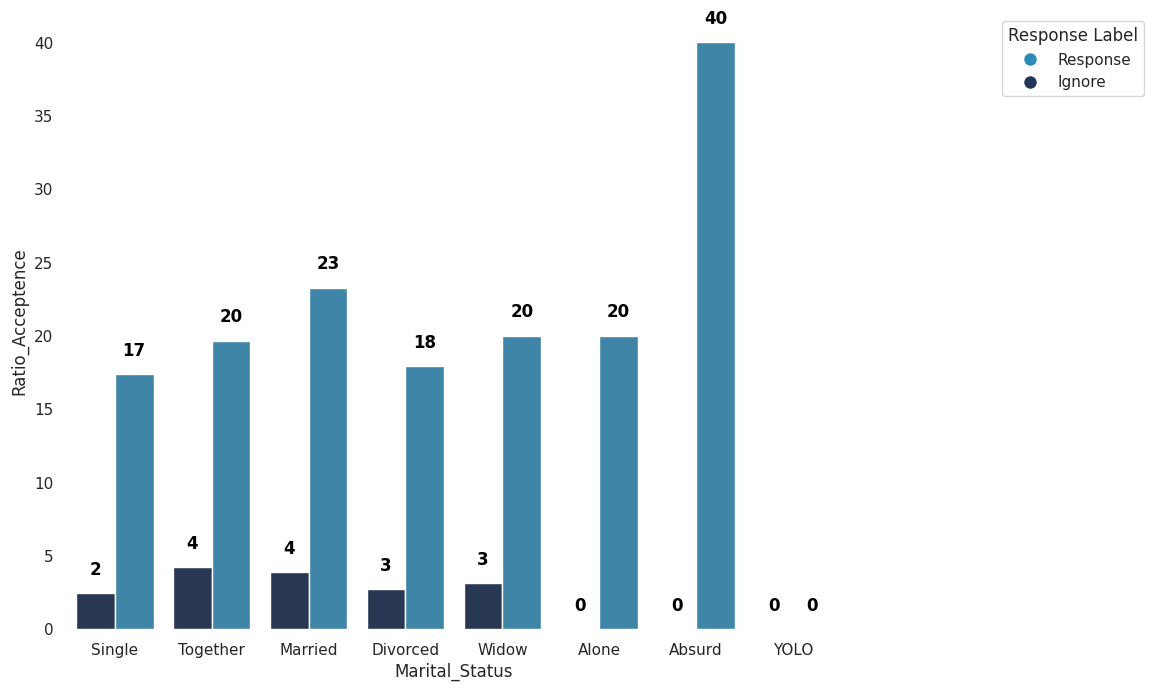

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Marital_Status',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Frequency Purchase

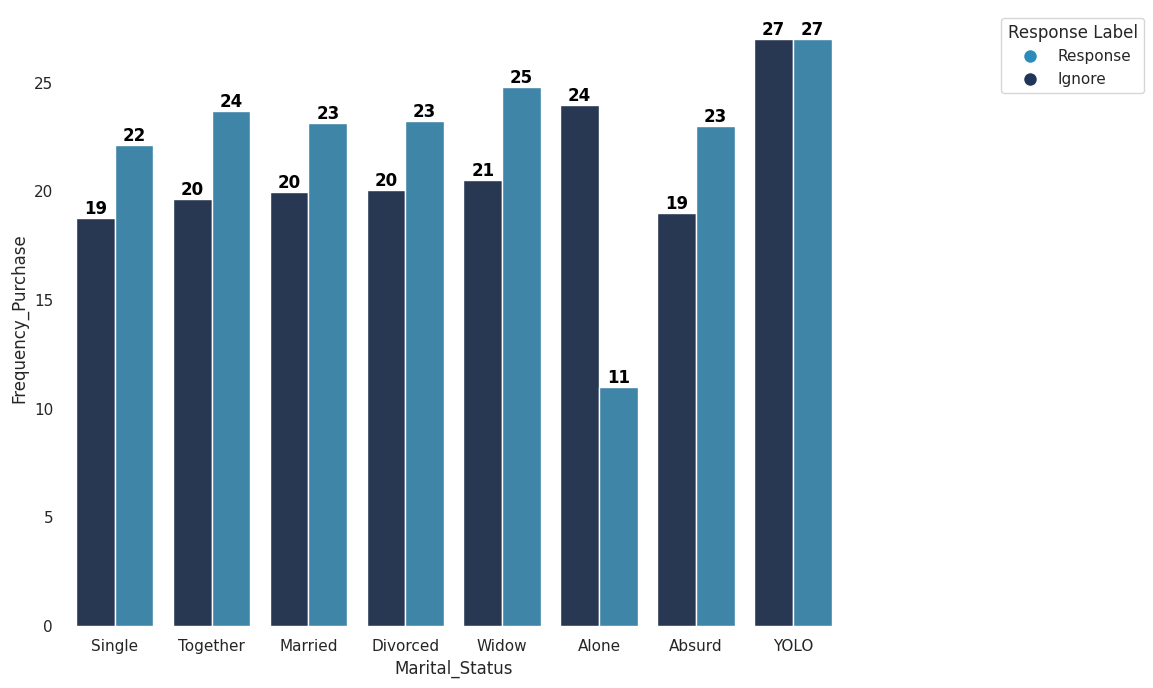

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Marital_Status',
                       y = 'Frequency_Purchase',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height , f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Total Revenue

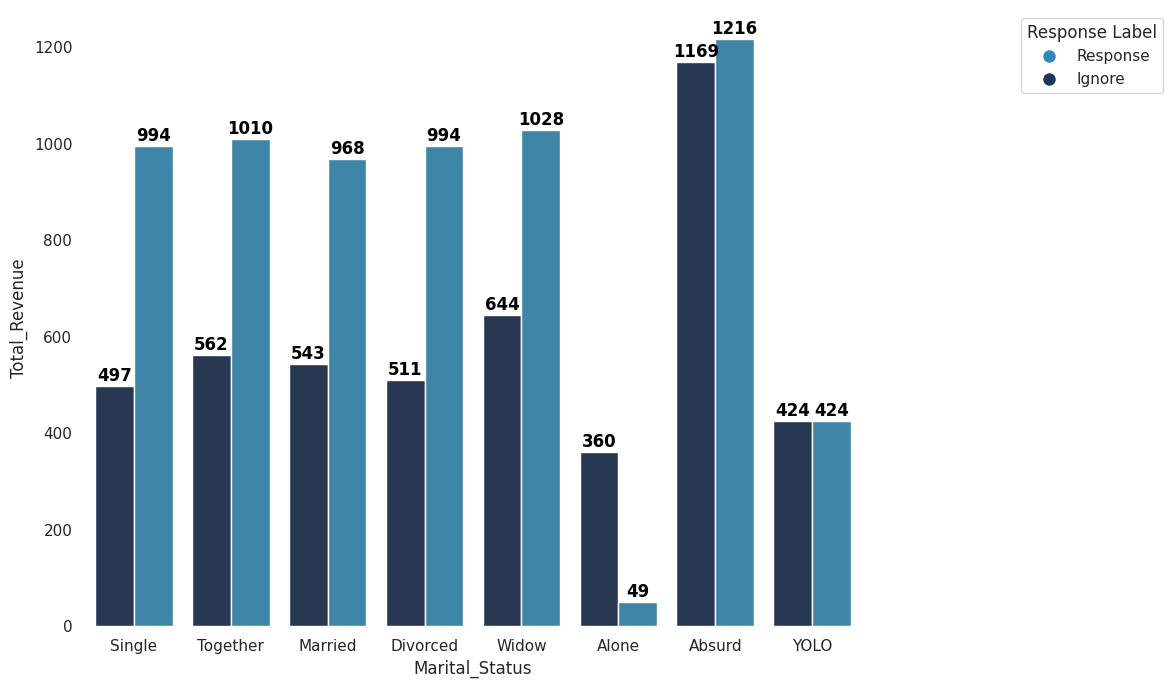

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Marital_Status',
                       y = 'Total_Revenue',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Recency

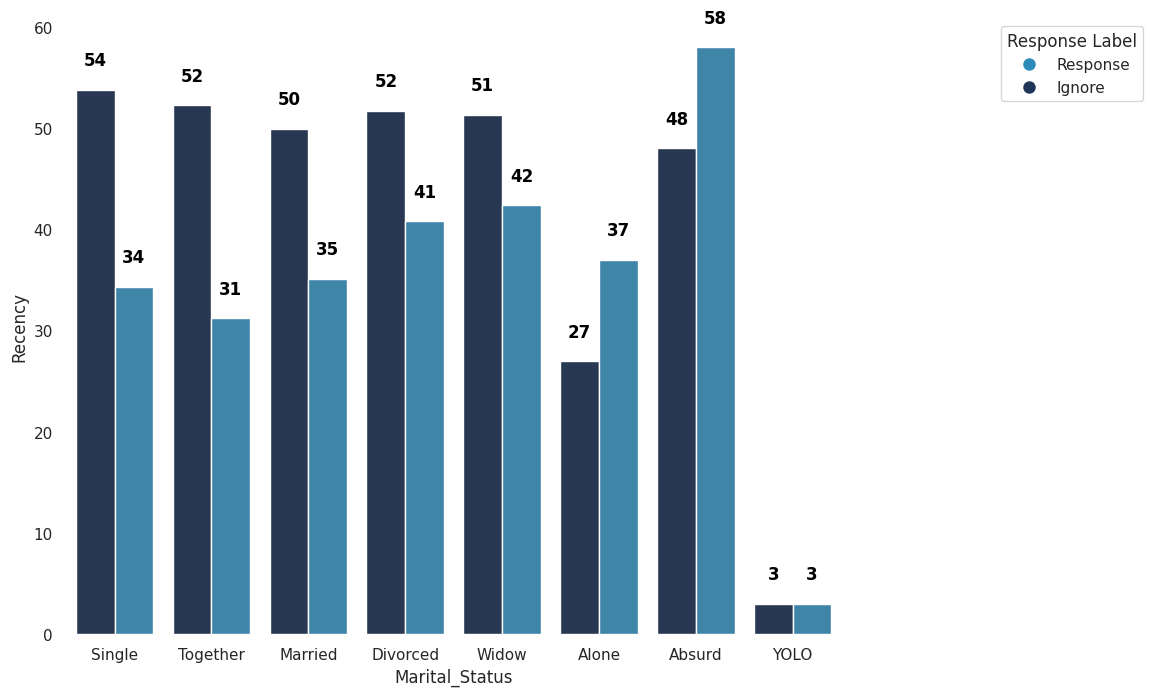

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Marital_Status',
                       y = 'Recency',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


## Income Category

### Ratio Acceptence

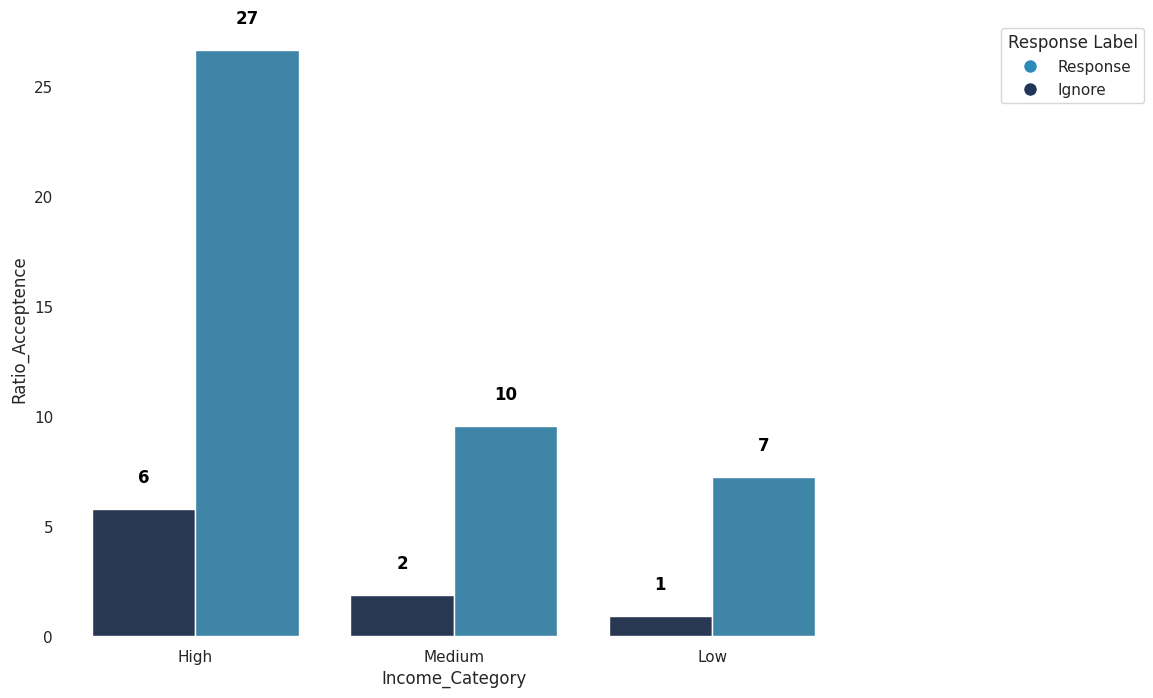

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Income_Category',
                       y = 'Ratio_Acceptence',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Frequency Purchase

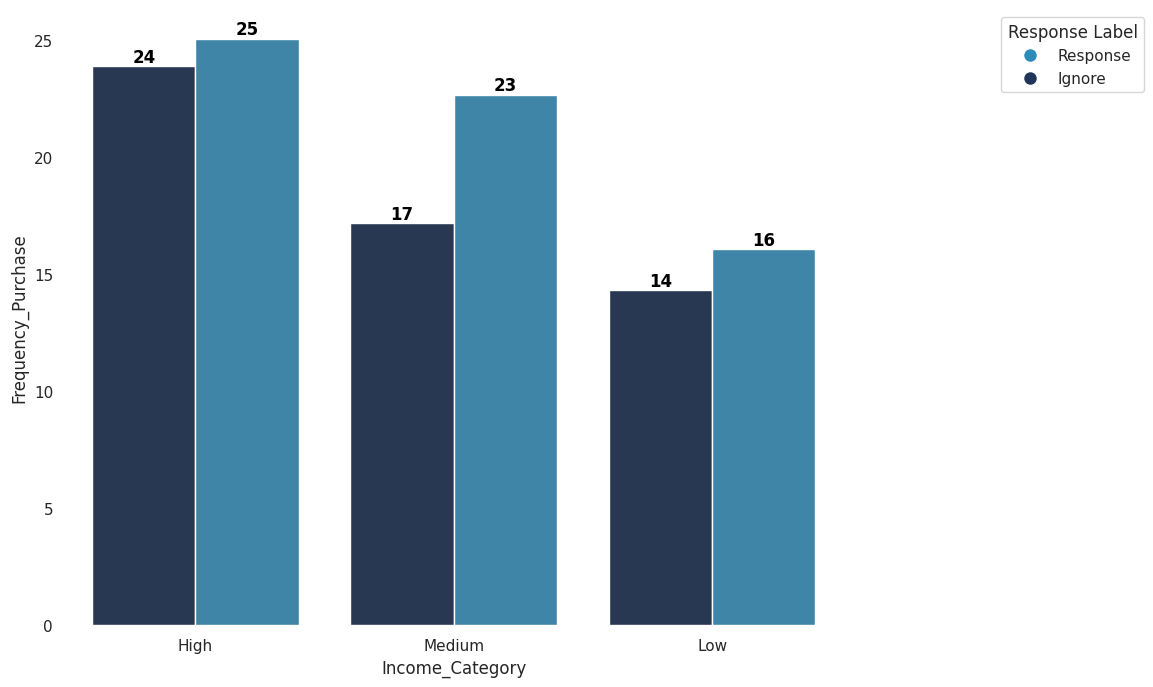

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Income_Category',
                       y = 'Frequency_Purchase',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height , f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Total Revenue

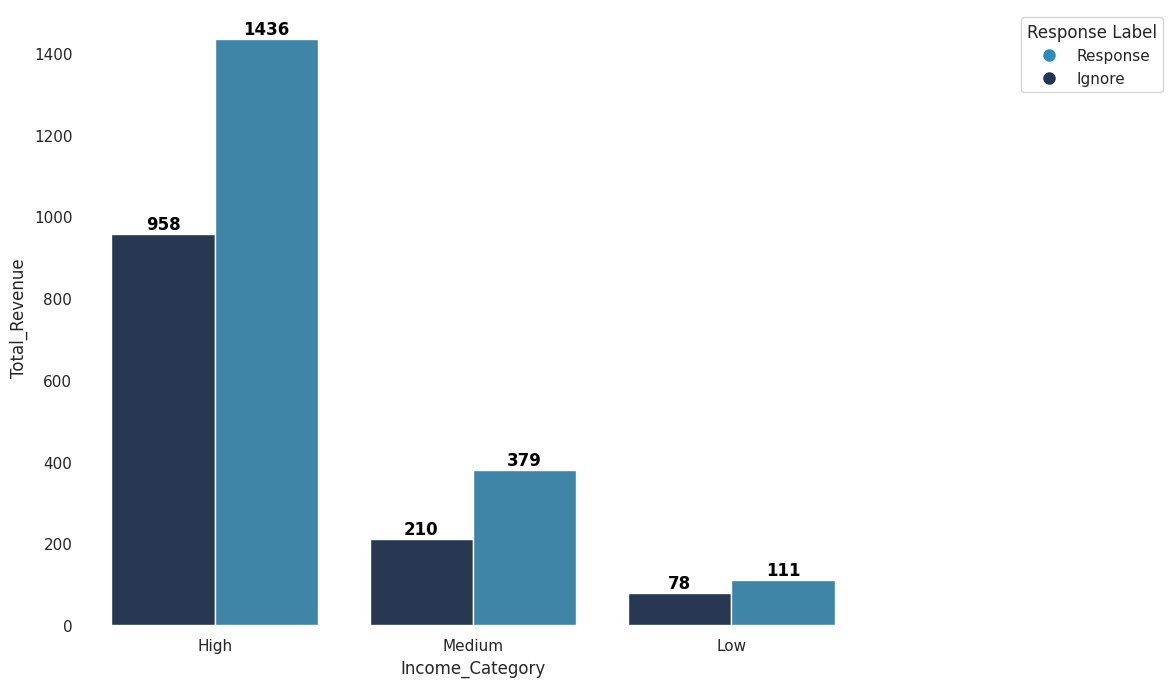

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Income_Category',
                       y = 'Total_Revenue',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


### Recency

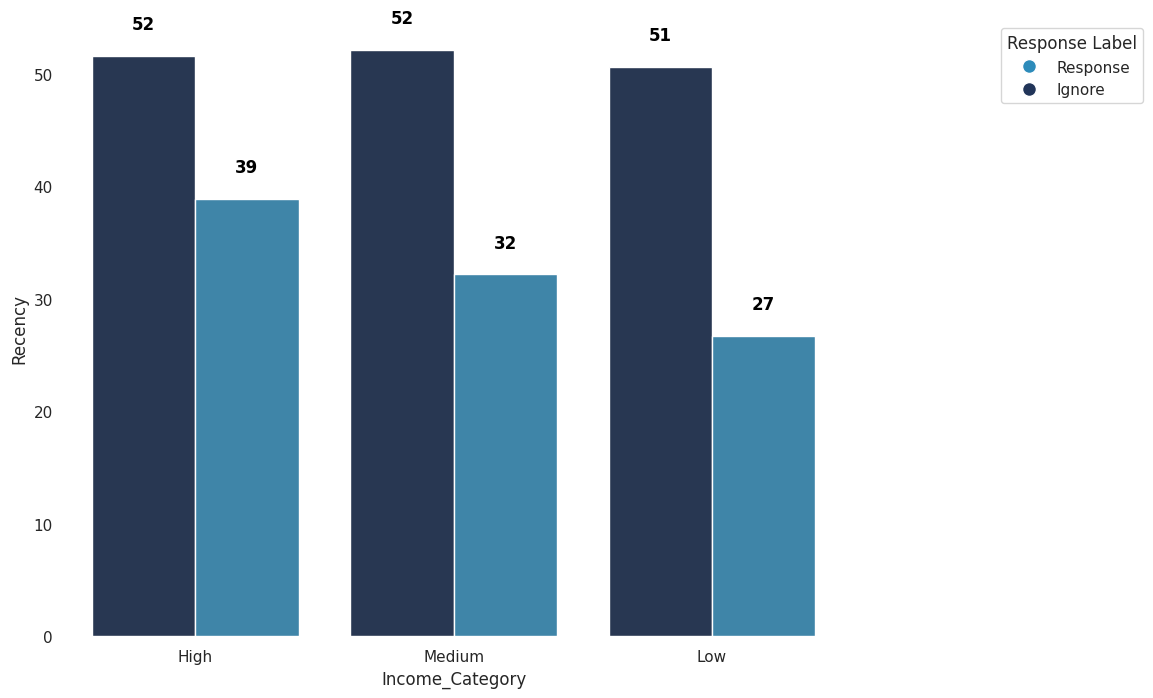

In [ ]:
# Setting Color Bar Plot
custom_color = {
    1: '#2D8BBA',  # Color for Response = 1
    0: '#213559',  # Color for Response = 0
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x ='Income_Category',
                       y = 'Recency',
                       hue = 'Response',
                       data = df,
                       palette = custom_color,
                       errorbar = None)

# Display values on top of each bar
for p in plot_sns.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Modifying Grid and Spines
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Modifying Legend
legend_labels = {1: 'Response', 0: 'Ignore'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_color[label], markersize=10) for label in legend_labels]
plt.legend(title='Response Label', labels=legend_labels.values(), handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

# Showing plot
plt.show()


# Insights and other visualization recommendations

In [ ]:
#1.c Data summanry
num=['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
cat=['Education', 'Marital_Status', 'Dt_Customer']
year=['Year_Birth']

In [ ]:
df_dropna = df.dropna()

In [ ]:
# duplicated data handling
df_dropna.duplicated().sum()

0

In [ ]:
#outlier Handling
print(f'Jumlah baris sebelum memfilter outlier: {len(df_dropna)}')

filtered_entries = np.array([True] * len(df_dropna))
for col in ['Income']:
    Q1 = df_dropna[col].quantile(0.25)
    Q3 = df_dropna[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_dropna[col] >= low_limit) & (df_dropna[col] <= high_limit)) & filtered_entries

df_clean = df_dropna[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 2208


In [ ]:
Q1 = df_clean['NumWebPurchases'].quantile(0.25)
Q3 = df_clean['NumWebPurchases'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean['NumWebPurchases'] < (Q1 - 1.5 * IQR)) | (df_clean['NumWebPurchases'] > (Q3 + 1.5 * IQR)))]

In [ ]:
Q1 = df_clean['NumCatalogPurchases'].quantile(0.25)
Q3 = df_clean['NumCatalogPurchases'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean['NumCatalogPurchases'] < (Q1 - 1.5 * IQR)) | (df_clean['NumCatalogPurchases'] > (Q3 + 1.5 * IQR)))]

In [ ]:
Q1 = df_clean['NumStorePurchases'].quantile(0.25)
Q3 = df_clean['NumStorePurchases'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean['NumStorePurchases'] < (Q1 - 1.5 * IQR)) | (df_clean['NumStorePurchases'] > (Q3 + 1.5 * IQR)))]

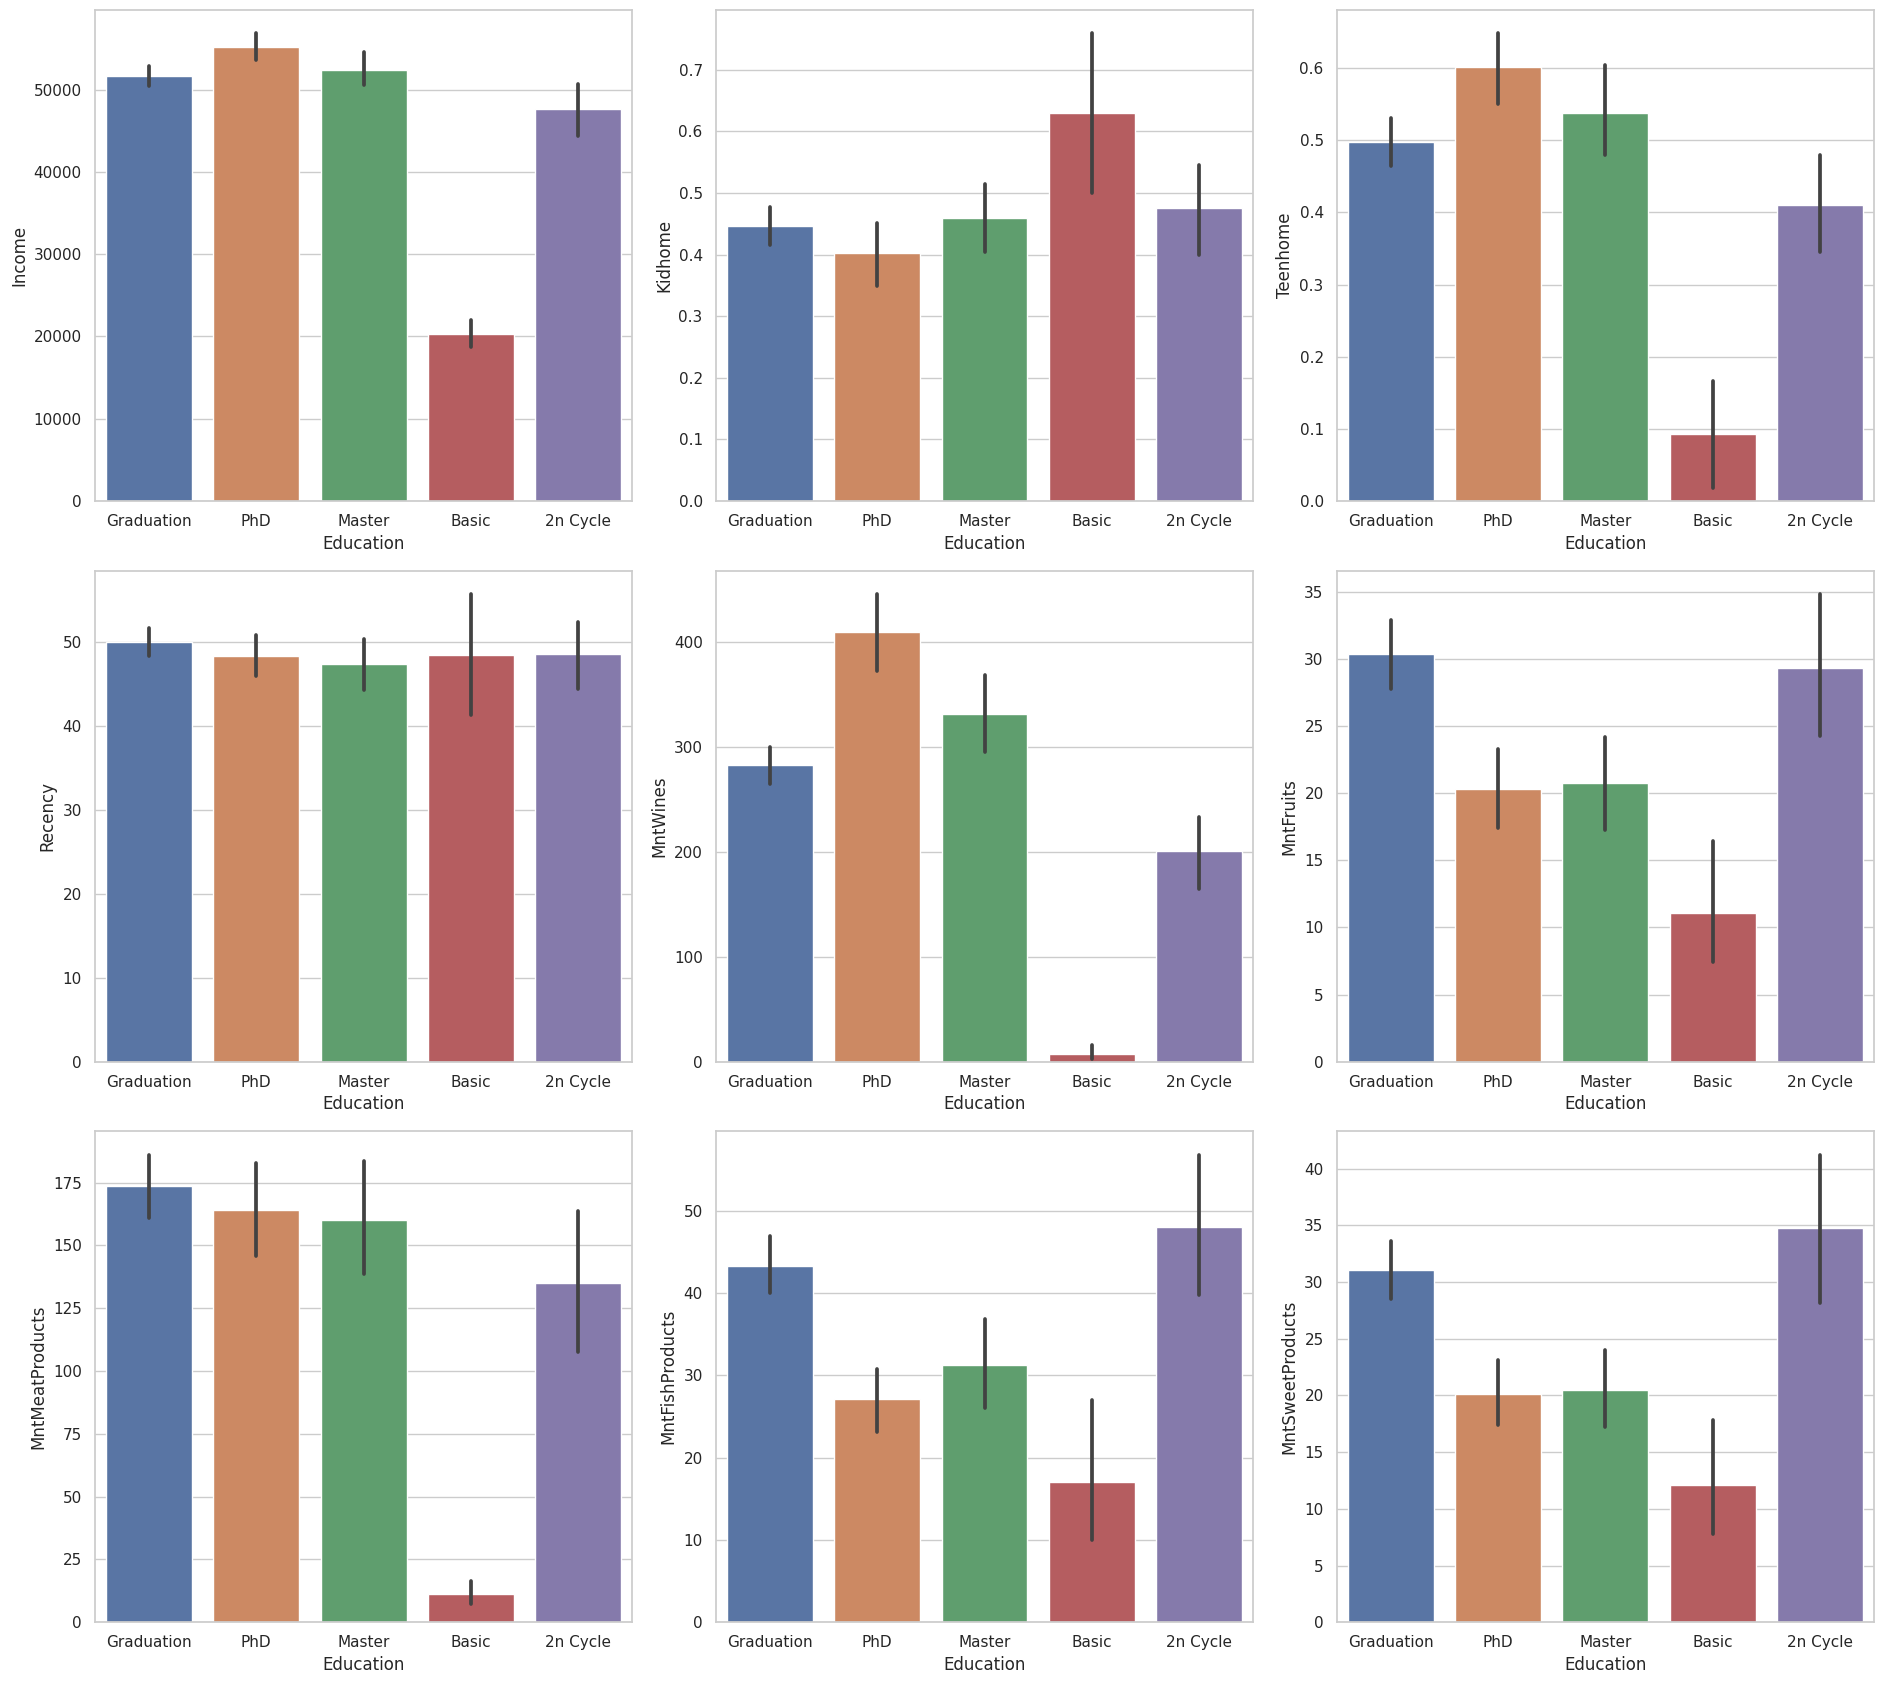

In [ ]:
fig = plt.figure(figsize=(19, 17))
for i in range(0, min(len(num), 9)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.barplot(ax=ax, data=df_clean, x='Education', y=num[i])
    plt.tight_layout()

## Insight
#### Pembelian tersebar merata di segala tingkat pendidikan, produk-produk wine didominasi level pendidikan PhD dimana level PhD memiliki income yang lebih baik dari level pendidikan manapun. Untuk produk daging, ikan, makanan manis dan buah didominasi tingkat graduation. Level pendidikan Basic memiliki daya beli yang rendah terhadap produk lainnya, terutama daging.

## Rekomendasi
#### Berdasarkan hasil analisis dari data yang diperoleh, maka kami merekomendasikan sebagai berikut<br>
1. Buat segmentasi pasar berdasarkan tingkat pendidikan. memisahkan strategi penjualan dan pemasaran untuk setiap segmen agar lebih sesuai dengan karakteristik dan kebutuhan kelompok pendidikan yang berbeda<br>
2. penawaran khusus atau diskon yang dapat menarik perhatian konsumen pada setiap level pendidikan. Misalnya, program diskon untuk siswa, penawaran spesial untuk mahasiswa, atau promosi khusus untuk lulusan.<br>
3. Mendapatkan umpan balik dari konsumen pada setiap level pendidikan dan tanggapi dengan cepat. Respons terhadap kebutuhan dan masukan konsumen dapat meningkatkan kepercayaan dan loyalitas.<br>


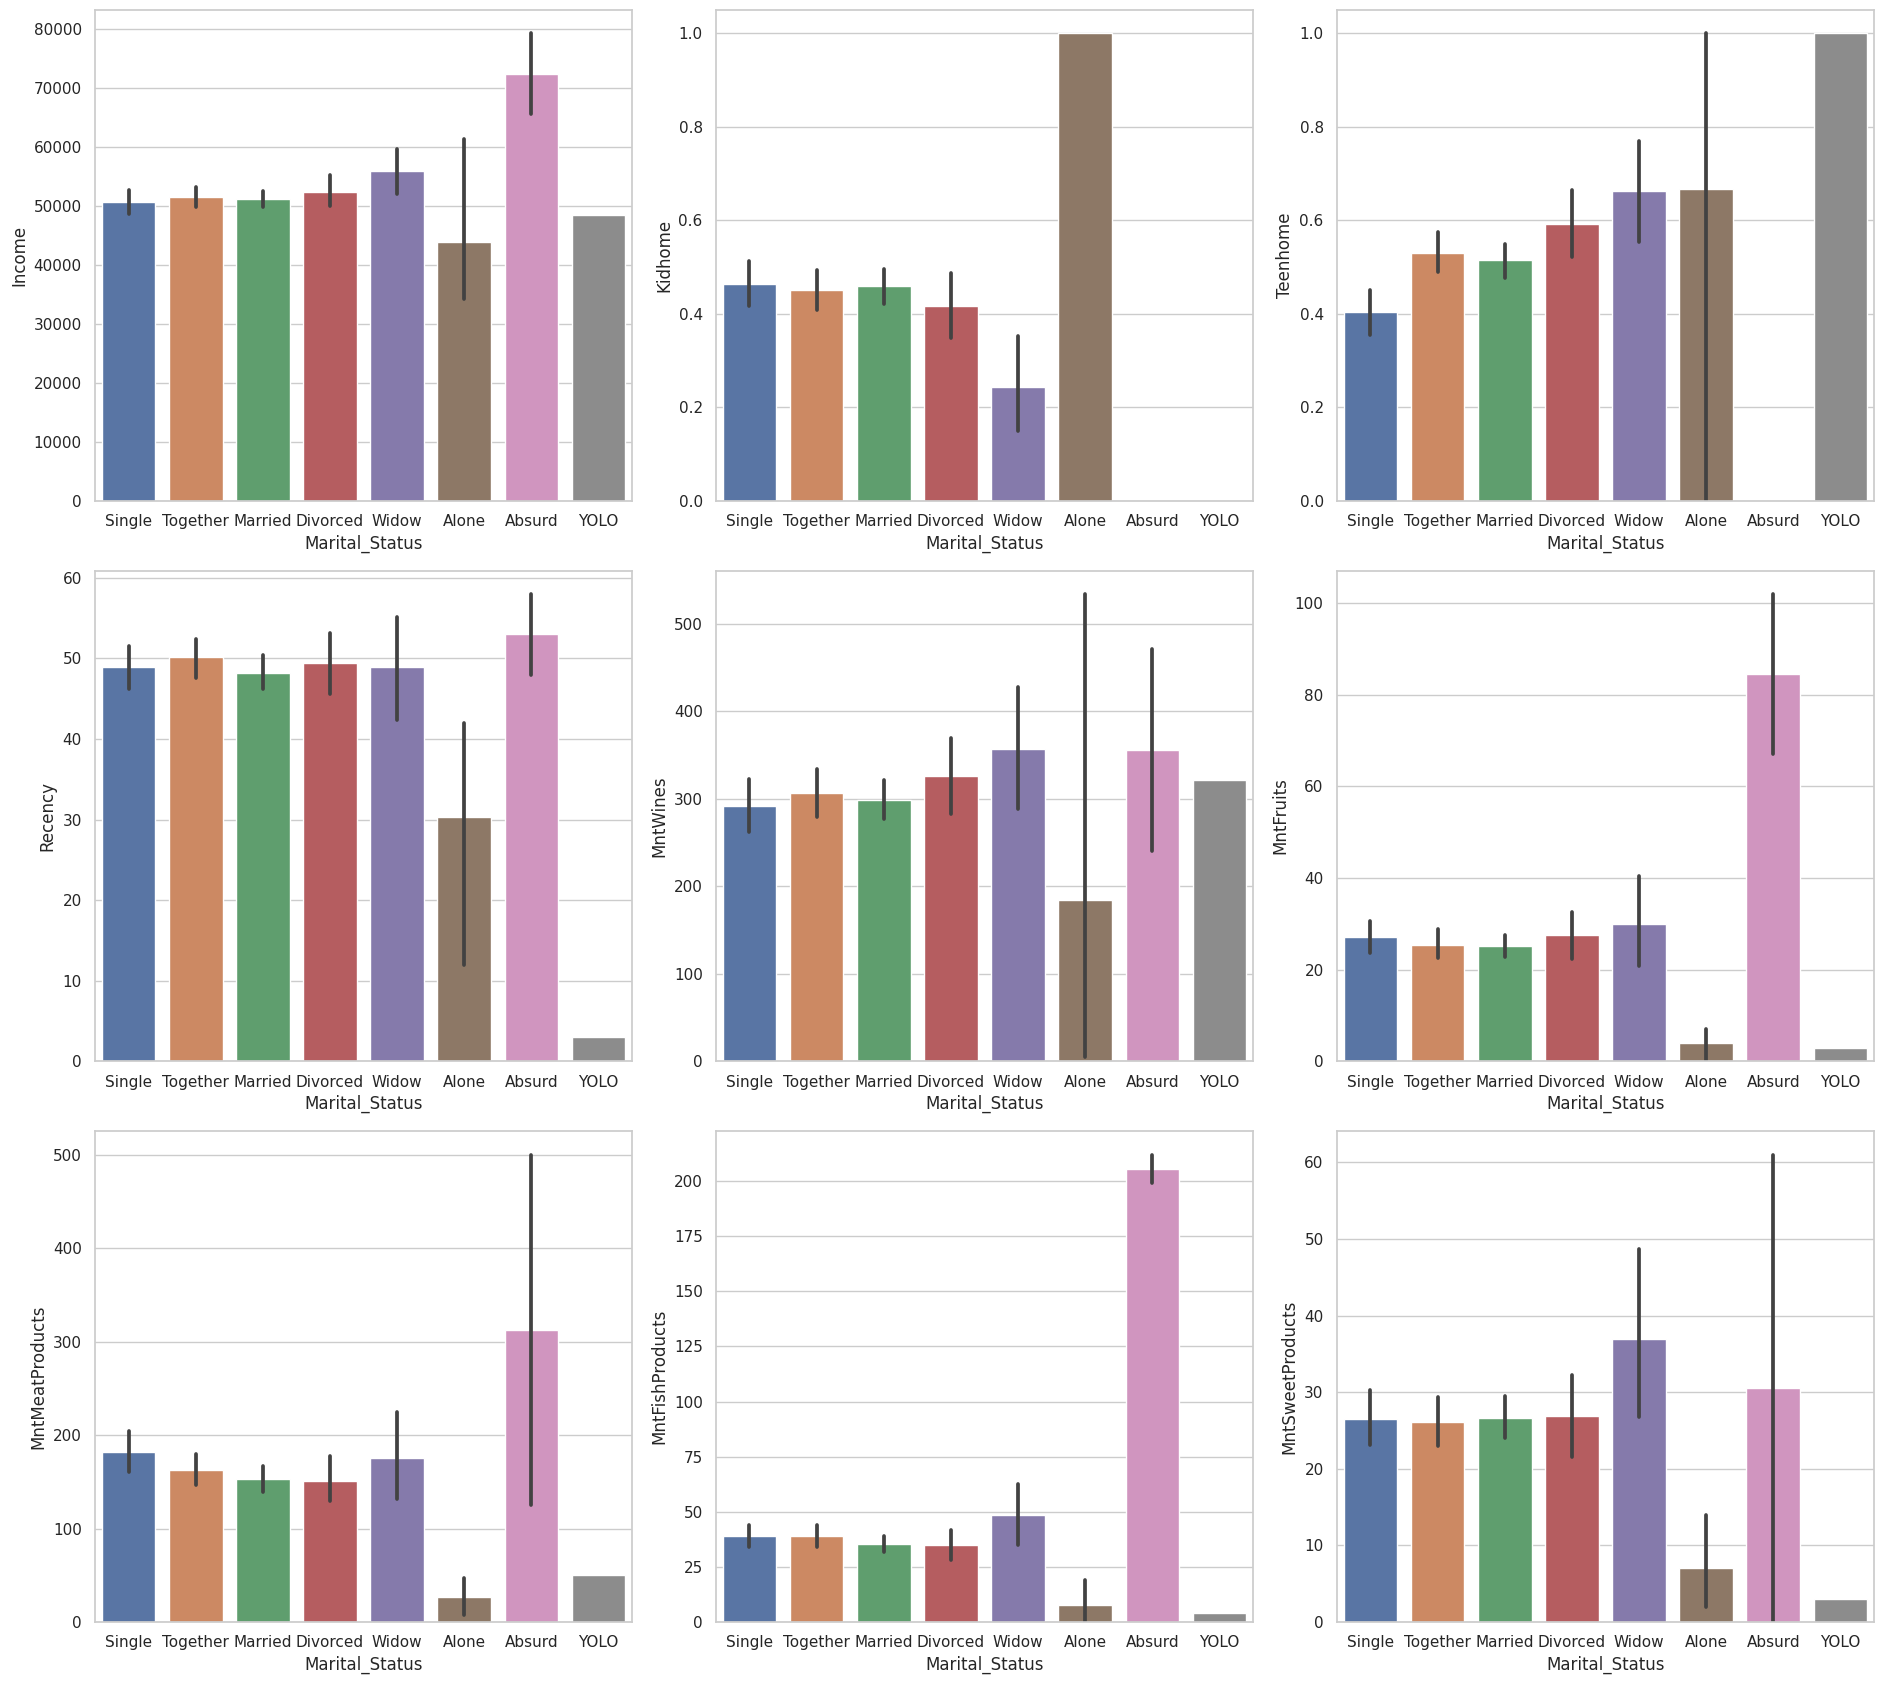

In [ ]:
fig = plt.figure(figsize=(19, 17))
for i in range(0, min(len(num), 9)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.barplot(ax=ax, data=df_clean, x='Marital_Status', y=num[i])
    plt.tight_layout()

## Insight
#### Penjualan wine memiliki level tertinggi dari product lain, penjualan produk ikan lebih rendah dari produk lain

## Rekomendasi
#### Berdasarkan hasil analisis dari data yang diperoleh, maka kami merekomendasikan sebagai berikut<br>
1. Buat segmentasi pasar berdasarkan status perkawinan. memisahkan strategi penjualan dan pemasaran untuk setiap segmen agar lebih sesuai dengan karakteristik dan kebutuhan kelompok yang berbeda<br>
2. penawaran khusus atau diskon yang dapat menarik perhatian konsumen pada produk daging, ikan dan buah<br>
3. Mendapatkan umpan balik dari konsumen dan tanggapi dengan cepat. Respons terhadap kebutuhan dan masukan konsumen dapat meningkatkan kepercayaan dan loyalitas.<br>


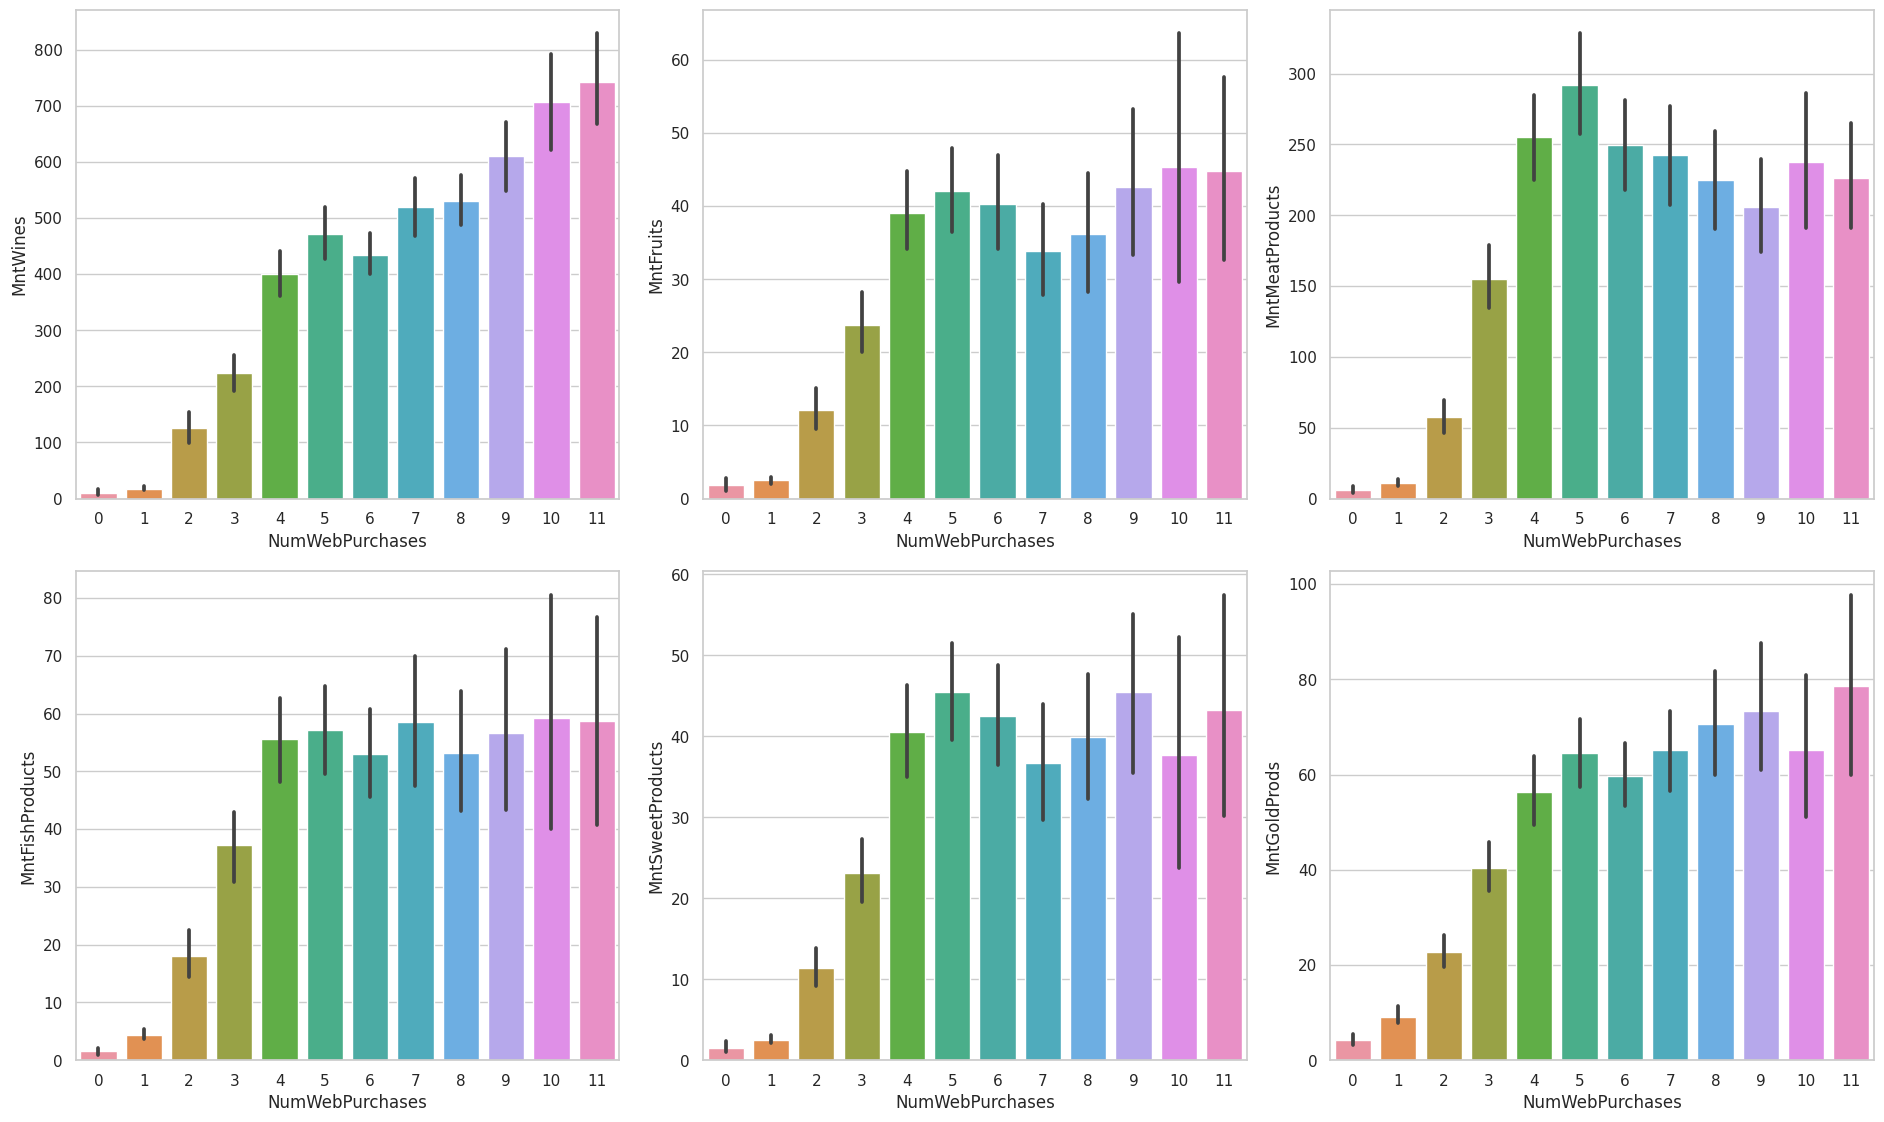

In [ ]:
fig = plt.figure(figsize=(19, 17))
for i in range(4, min(len(num), 10)):
    ax = fig.add_subplot(3, 3, i)
    sns.barplot(ax=ax, data=df_clean, x='NumWebPurchases', y=num[i])
    plt.tight_layout()

## Insight
Jumlah penjualan produk tertinggi pada web adalah wine. Jika dilihat dari jumlah pembelian, konsumen yang melakukan pembelian produk berulang cukup merata.

## Recomendation
1. Memberikan promo atau diskon pada produk seperti ikan, buah, dan dessert jika membeli lewat web.
2. Membuat web yang menarik dan praktis agar konsumen tertarik bertransaksi dengan web.

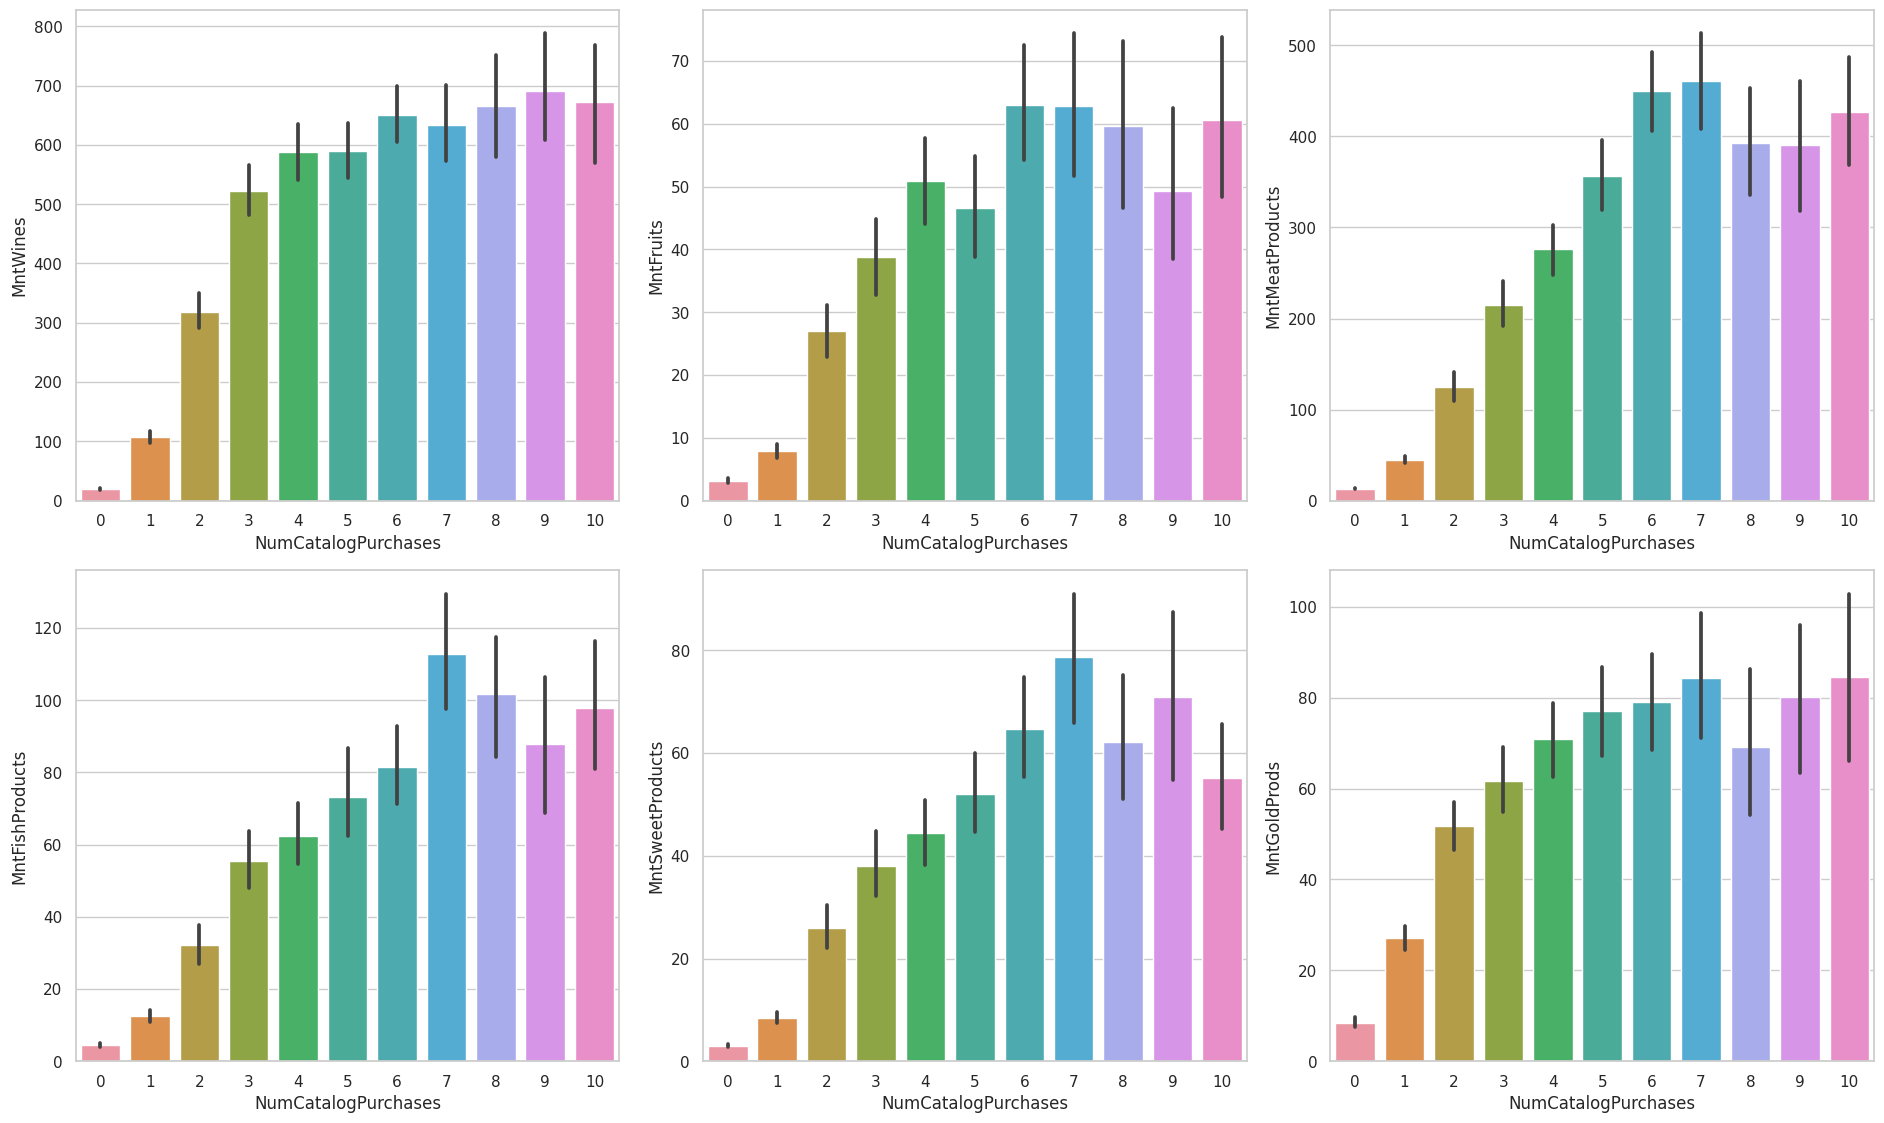

In [ ]:
fig = plt.figure(figsize=(19, 17))
for i in range(4, min(len(num), 10)):
    ax = fig.add_subplot(3, 3, i)
    sns.barplot(ax=ax, data=df_clean, x='NumCatalogPurchases', y=num[i])
    plt.tight_layout()

## Insight
Jumlah penjualan produk tertinggi pada catalog adalah wine. Produk meat pada catalog juga cukup tinggi jika dibandingkan dengan  web dan toko.
## Recomendation
1. Catalog lebih cocok jika menjual produk daging, ikan, buah, dan dessert. Terbukti dengan banyaknya konsumen yang membeli kembali produk produk tersebut

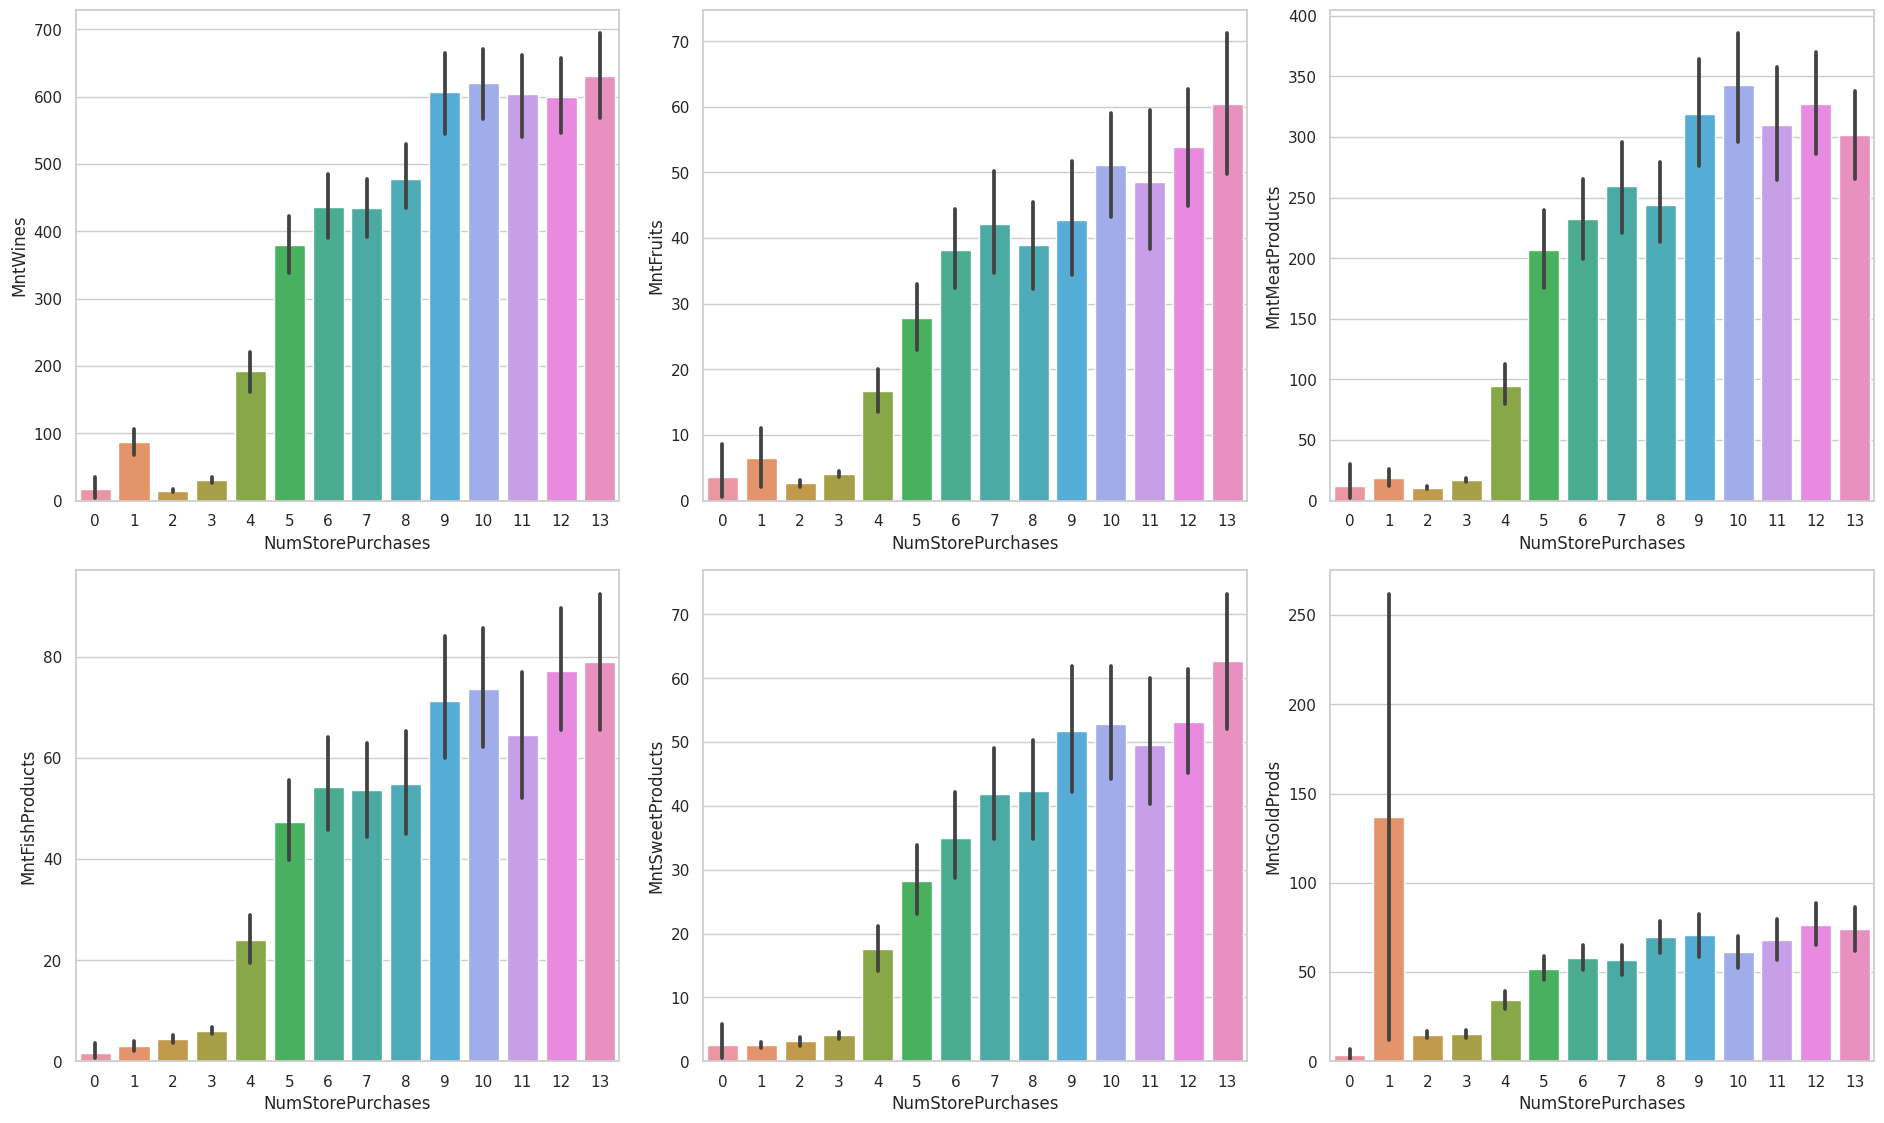

In [ ]:
fig = plt.figure(figsize=(19, 17))
for i in range(4, min(len(num), 10)):
    ax = fig.add_subplot(3, 3, i)
    sns.barplot(ax=ax, data=df_clean, x='NumStorePurchases', y=num[i])
    plt.tight_layout()

## Insight
Jumlah penjualan produk tertinggi pada toko adalah wine. Konsumen yang melakukan pembelian berulang juga cukup banyak jika dibandingkan dengan web dan catalog. Nilai 0-3 di setiap produknya terlihat cukup merata, kemudian naik secara signifikan pada 4 kali pembelian dan naik pada jumlah pembelian selanjutnya.

## Recomendation
1. Memaksimalkan kampanye pada toko, karena konsumen lebih banyak berbelanja menggunakan toko dibandingkan dengan web dan catalog.

<Figure size 2500x2500 with 0 Axes>

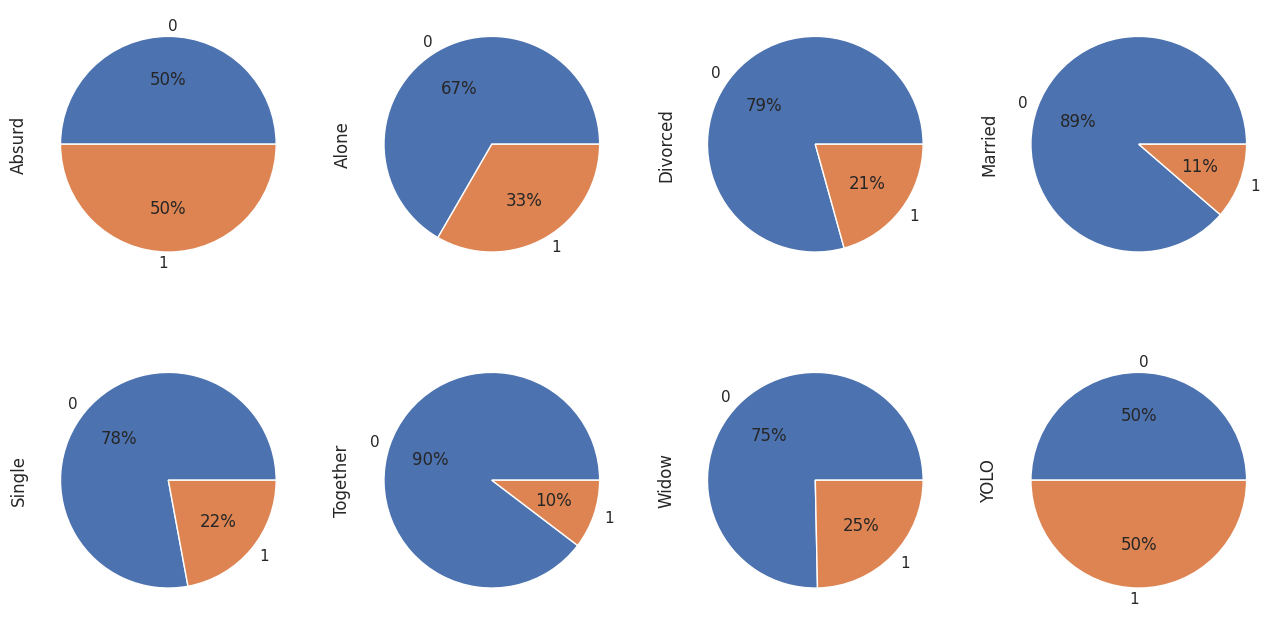

In [ ]:
plt.figure(figsize=(25, 25))

pd.crosstab(index=df['Response'], columns=df['Marital_Status']).plot(kind="pie", figsize=(16, 8), subplots=True, layout=(2,4),autopct='%1.0f%%', legend=False)
plt.show()

## Insight
Berapa persentase pelanggan yang menjawab dan tidak menjawab berdasarkan status pernikahan?

## Recomendation
Dari visualisasi piechart Status Perkawinan, dapat dilihat bahwa nasabah yang paling banyak memberikan respon berasal dari nasabah yang berstatus Lajang (50%) dan Yolo (50%), disusul dengan Alone (33%) dan Widow (25%), sehingga tim marketing dapat memfokuskan campaign kepada nasabah yang berstatus Lajang dan Yolo.

<Figure size 2000x2000 with 0 Axes>

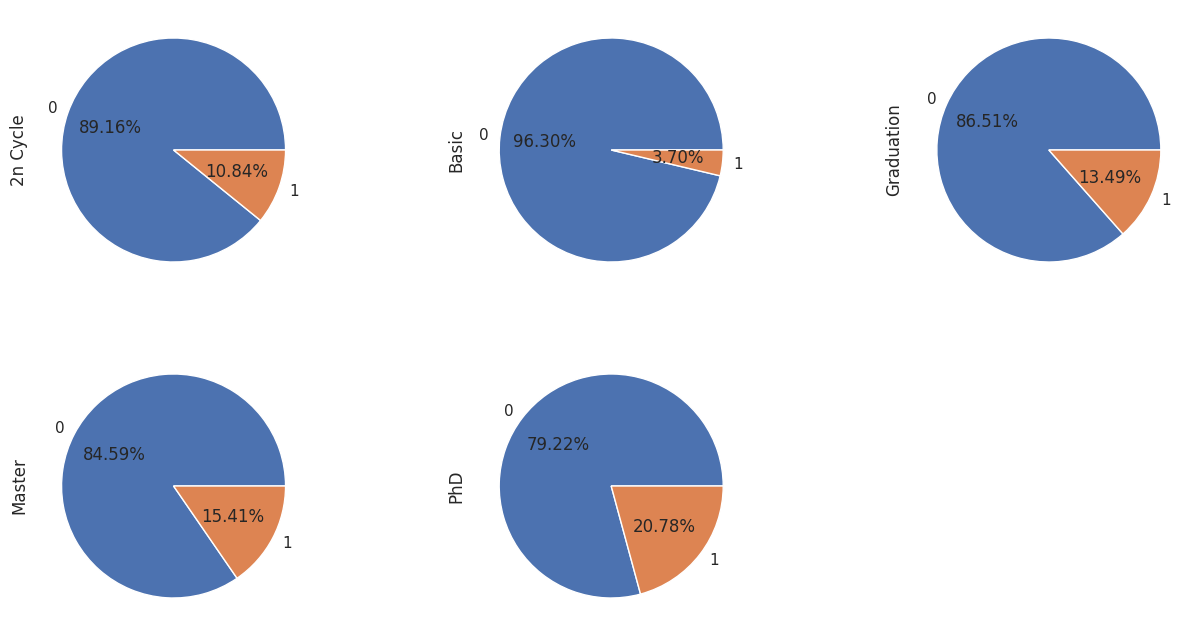

In [ ]:
plt.figure(figsize=(20, 20))

pd.crosstab(index=df['Response'], columns=df['Education']).plot(kind="pie", figsize=(16, 8), layout = (2,3), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

## Insight
Berapa persentase pelanggan yang menjawab dan tidak menjawab berdasarkan tingkat pendidikan?

## Recomendation
Dari visualisasi Education piechart, terlihat bahwa nasabah yang paling banyak memberikan respon berasal dari nasabah yang berpendidikan PhD (20,78%), disusul Master (15,41%), sehingga tim marketing dapat memfokuskan kampanye pada nasabah yang berpendidikan "PhD".


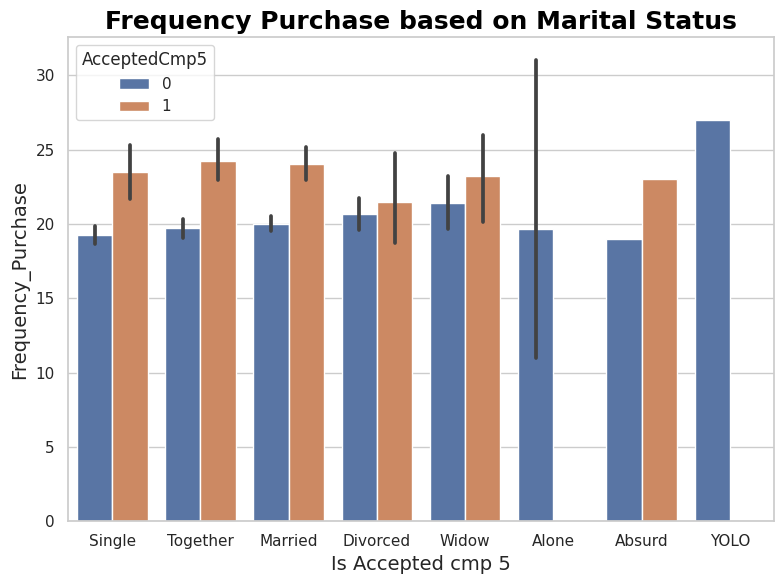

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Marital_Status', y='Frequency_Purchase', hue='AcceptedCmp5', data=df)

plt.title("Frequency Purchase based on Marital Status",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Frequency_Purchase', fontsize=14) # y axis label
plt.xlabel('Is Accepted cmp 5', fontsize=14) # x axis label
#plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()

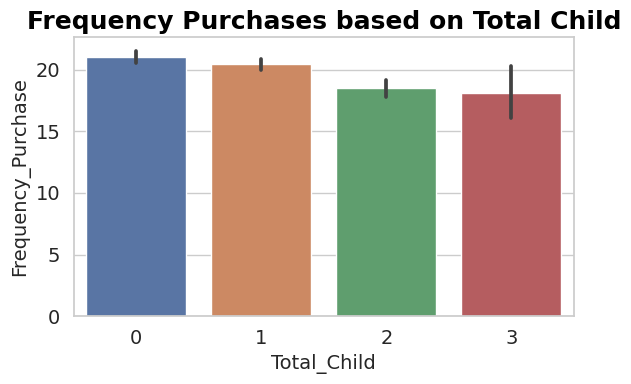

In [ ]:
df['Total_Child'] = df['Kidhome'] + df['Teenhome']
df.Total_Child.value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x='Total_Child', y='Frequency_Purchase', data=df)

plt.title("Frequency Purchases based on Total Child",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Frequency_Purchase', fontsize=14) # y axis label
plt.xlabel('Total_Child', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.tight_layout()

## Insight
Berdasarkan data pada terakhir (AcceptedCmp5) terdapat data angka pembelian tinggi pada kategori ‘Together’ dan ‘Married’, sedangkan pembelian berbanding terbalik dengan total anak


## Recomendation
1. Lebih memfokuskan untuk membuat campaign produk keluarga atau anak guna meningkatkan pembelian pada next campaign
2. Membuat promo campaign lebih stable untuk single
3. Membuat campaign bundling MntFruits yang relevan untuk single dan bekeluarga
4. Untuk mengimbangi customer yang mempunyai anak, membuat campaign semakin banyak anak semakin tinggi discount
5. Membuat bundling produk 'MntMeat' atau 'MntWine' dengan 'MntFruits' guna meningkatkan penjualan buah-buahan karena tingginya tingkat penjualan daging dan wine
